In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import utilities.msmr as msmr
import utilities.plotting as mp

from collections import Counter
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from scipy.optimize import fmin_slsqp
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter as sf

plt.style.use('default')

<a id='top'></a>

### Index
1. [Analyzing All Datasets](#Analyzing-The-Experimental-Datasets)
1. [Half Cell Models](#Half-Cell-Models)
1. [Fresh Cell Fit and Comparisons](#Fresh-Cell-Fit-and-Comparisons)
1. [Fitting 300 and 600 Cycles](#Fitting-300-and-600-Cycles)
7. [Individual Electrodes Over Cycling](#Individual-Electrodes-Over-Cycling)
2. [0 Cycle Replicate Fitting](#0-Cycle-Replicate-Fitting)
3. [300 Cycles Replicate Fitting](#300-Cycles-Replicate-Fitting)
4. [600 Cycles Replicate Fitting](#600-Cycles-Replicate-Fitting)
5. [Reaction Peaks Over Cycling](#Reaction-Peaks-Over-Cycling)
7. [Bootstrap Analysis](#Bootstrap-Analysis)
8. [Discharged Fitting Results](#Discharged-Fitting-Results)

<a id= 'Analyzing-The-Experimental-Datasets'></a>

## Analyzing The Experimental Datasets

<p>&nbsp;</p>

[Back To Top](#top)

Importing all data for the three representative cases and going through the data to look at hysteresis, variation in cell capacities, and how reproducible the C/20 curves are amongst replicates

In [2]:
# Loading in voltage, current, capacity, dvdq, and the interpolated values for each cell
voltage_range_c = np.linspace(3.49, 4.15, 1000)
folderpath = '../supplementary-files/experimental-data/'
# 0 Cycles
fresh_voltage_51, fresh_current_51, fresh_capacity_51, fresh_dvdq_51, data_cap_interp_51, data_dvdq_interp_51 = msmr.load_experiment_data(folderpath+'OCV_estimation_charge_Cell51.csv', 0.075, 10, 99, voltage_range_c) 
fresh_voltage_52, fresh_current_52, fresh_capacity_52, fresh_dvdq_52, data_cap_interp_52, data_dvdq_interp_52 = msmr.load_experiment_data(folderpath+'OCV_estimation_charge_Cell52.csv', 0.075, 10, 99, voltage_range_c)
fresh_voltage_53, fresh_current_53, fresh_capacity_53, fresh_dvdq_53, data_cap_interp_53, data_dvdq_interp_53 = msmr.load_experiment_data(folderpath+'OCV_estimation_charge_Cell53.csv', 0.075, 10, 99, voltage_range_c) 
fresh_voltage_54, fresh_current_54, fresh_capacity_54, fresh_dvdq_54, data_cap_interp_54, data_dvdq_interp_54 = msmr.load_experiment_data(folderpath+'OCV_estimation_charge_Cell54.csv', 0.075, 10, 99, voltage_range_c) 

# 300 Cycles
aged_300_voltage_1, aged_300_current_1, aged_300_capacity_1, aged_300_dvdq_1, a300_data_cap_interp_1, a300_data_dvdq_interp_1 = msmr.load_experiment_data(folderpath+'OCV_estimation_charge_Cell1.csv', 0.075, 10, 99, voltage_range_c) 
aged_300_voltage_2, aged_300_current_2, aged_300_capacity_2, aged_300_dvdq_2, a300_data_cap_interp_2, a300_data_dvdq_interp_2 = msmr.load_experiment_data(folderpath+'OCV_estimation_charge_Cell2.csv', 0.075, 10, 99, voltage_range_c) 
aged_300_voltage_3, aged_300_current_3, aged_300_capacity_3, aged_300_dvdq_3, a300_data_cap_interp_3, a300_data_dvdq_interp_3 = msmr.load_experiment_data(folderpath+'OCV_estimation_charge_Cell3.csv', 0.075, 10, 99, voltage_range_c) 
aged_300_voltage_4, aged_300_current_4, aged_300_capacity_4, aged_300_dvdq_4, a300_data_cap_interp_4, a300_data_dvdq_interp_4 = msmr.load_experiment_data(folderpath+'OCV_estimation_charge_Cell4.csv', 0.075, 10, 99, voltage_range_c) 

# 600 Cycles
aged_600_voltage_49, aged_600_current_49, aged_600_capacity_49, aged_600_dvdq_49, a600_data_cap_interp_49, a600_data_dvdq_interp_49 = msmr.load_experiment_data(folderpath+'OCV_estimation_charge_Cell49.csv', 0.075, 10, 99, voltage_range_c)
aged_600_voltage_50, aged_600_current_50, aged_600_capacity_50, aged_600_dvdq_50, a600_data_cap_interp_50, a600_data_dvdq_interp_50 = msmr.load_experiment_data(folderpath+'OCV_estimation_charge_Cell50.csv', 0.075, 10, 99, voltage_range_c)

In [3]:
# Loading in voltage, current, capacity, dvdq, and the interpolated values for each cell
voltage_range_d = np.linspace(3.45, 4.15, 1000)

# 0 Cycles
fresh_voltage_51d, fresh_current_51d, fresh_capacity_51d, fresh_dvdq_51d, data_cap_interp_51d, data_dvdq_interp_51d = msmr.load_experiment_data(folderpath+'OCV_estimation_discharge_Cell51.csv', 0.075, 10, 99, voltage_range_d) 
fresh_voltage_52d, fresh_current_52d, fresh_capacity_52d, fresh_dvdq_52d, data_cap_interp_52d, data_dvdq_interp_52d = msmr.load_experiment_data(folderpath+'OCV_estimation_discharge_Cell52.csv', 0.075, 10, 99, voltage_range_d) 
fresh_voltage_53d, fresh_current_53d, fresh_capacity_53d, fresh_dvdq_53d, data_cap_interp_53d, data_dvdq_interp_53d = msmr.load_experiment_data(folderpath+'OCV_estimation_discharge_Cell53.csv', 0.075, 10, 99, voltage_range_d) 
fresh_voltage_54d, fresh_current_54d, fresh_capacity_54d, fresh_dvdq_54d, data_cap_interp_54d, data_dvdq_interp_54d = msmr.load_experiment_data(folderpath+'OCV_estimation_discharge_Cell54.csv', 0.075, 10, 99, voltage_range_d) 

# 300 Cycles
aged_300_voltage_1d, aged_300_current_1d, aged_300_capacity_1d, aged_300_dvdq_1d, a300_data_cap_interp_1d, a300_data_dvdq_interp_1d = msmr.load_experiment_data(folderpath+'OCV_estimation_discharge_Cell1.csv', 0.075, 10, 99, voltage_range_d) 
aged_300_voltage_2d, aged_300_current_2d, aged_300_capacity_2d, aged_300_dvdq_2d, a300_data_cap_interp_2d, a300_data_dvdq_interp_2d = msmr.load_experiment_data(folderpath+'OCV_estimation_discharge_Cell2.csv', 0.075, 10, 99, voltage_range_d) 
aged_300_voltage_3d, aged_300_current_3d, aged_300_capacity_3d, aged_300_dvdq_3d, a300_data_cap_interp_3d, a300_data_dvdq_interp_3d = msmr.load_experiment_data(folderpath+'OCV_estimation_discharge_Cell3.csv', 0.075, 10, 99, voltage_range_d) 
aged_300_voltage_4d, aged_300_current_4d, aged_300_capacity_4d, aged_300_dvdq_4d, a300_data_cap_interp_4d, a300_data_dvdq_interp_4d = msmr.load_experiment_data(folderpath+'OCV_estimation_discharge_Cell4.csv', 0.075, 10, 99, voltage_range_d) 

# 600 Cycles
aged_600_voltage_49d, aged_600_current_49d, aged_600_capacity_49d, aged_600_dvdq_49d, a600_data_cap_interp_49d, a600_data_dvdq_interp_49d = msmr.load_experiment_data(folderpath+'OCV_estimation_discharge_Cell49.csv', 0.075, 10, 99, voltage_range_d)
aged_600_voltage_50d, aged_600_current_50d, aged_600_capacity_50d, aged_600_dvdq_50d, a600_data_cap_interp_50d, a600_data_dvdq_interp_50d = msmr.load_experiment_data(folderpath+'OCV_estimation_discharge_Cell50.csv', 0.075, 10, 99, voltage_range_d)

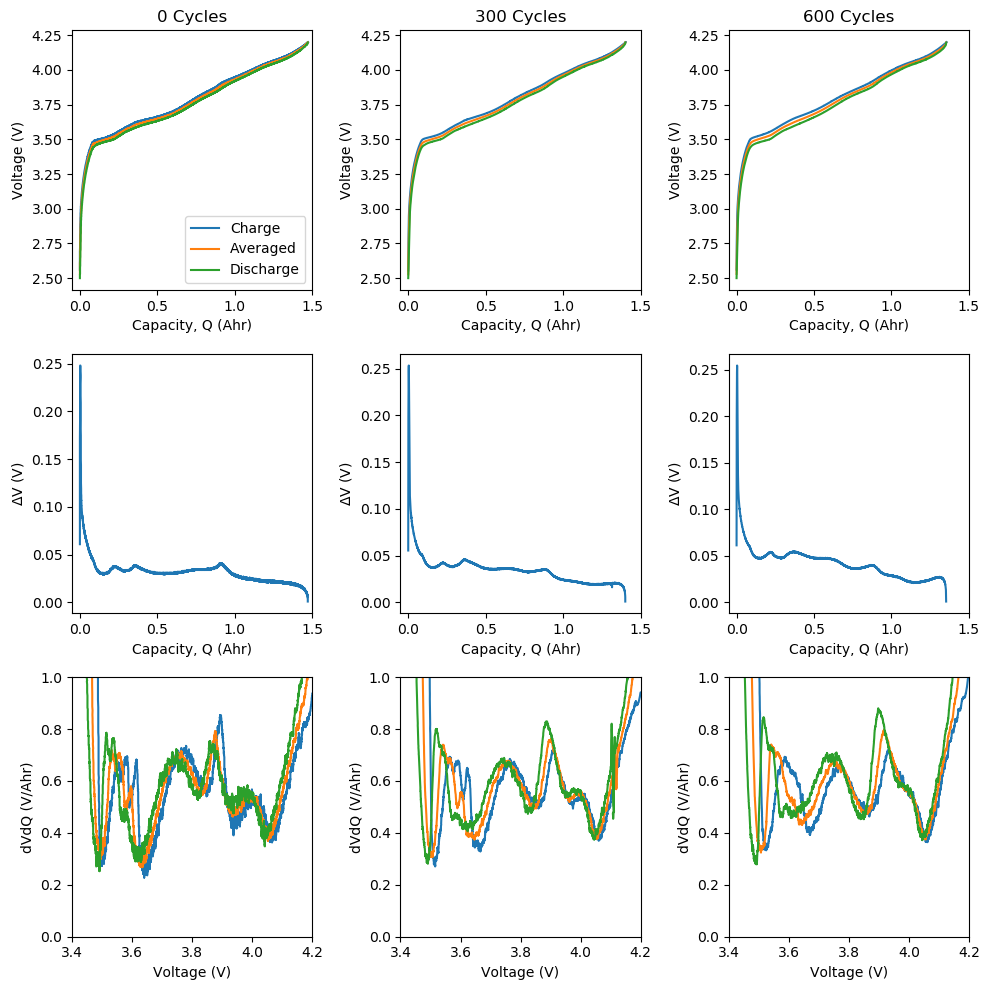

In [4]:
# Plotting fresh, 300, and 600 cycles OCV and dVdQ curves for both charge
# and discharge and the average value between the them.

def interp_data(capacity_data, voltage_data, voltage_range):
    dvdt_data = sf(x=voltage_data, window_length=99, polyorder=3, deriv=1, delta=10)
    dvdq_data = dvdt_data / (0.075/3600)
    f_cap_interp = interp1d(voltage_data, capacity_data)
    f_dvdq_interp = interp1d(voltage_data, dvdq_data)
    return dvdq_data, f_cap_interp(voltage_range), f_dvdq_interp(voltage_range)

fresh_voltage_51a = (fresh_voltage_51[0:len(fresh_capacity_51d)] + np.flip(fresh_voltage_51d))/2
aged_300_voltage_1a = (aged_300_voltage_1[0:len(aged_300_capacity_1d)] + np.flip(aged_300_voltage_1d))/2
aged_600_voltage_49a = (aged_600_voltage_49[0:len(aged_600_capacity_49d)] + np.flip(aged_600_voltage_49d))/2

fresh_dvdq_51a, data_avg_cap_interp, data_avg_dvdq_interp = interp_data(fresh_capacity_51d, fresh_voltage_51a, voltage_range_d)
aged_300_dvdq_1a, data_300_avg_cap_interp_1, data_300_avg_dvdq_interp_1 = interp_data(aged_300_capacity_1d, aged_300_voltage_1a, voltage_range_d)
aged_600_dvdq_49a, data_600_avg_cap_interp_49, data_600_avg_dvdq_interp_49 = interp_data(aged_600_capacity_49d, aged_600_voltage_49a, voltage_range_d)

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
ax[0,0].plot(fresh_capacity_51, fresh_voltage_51, label='Charge')
ax[0,0].plot(fresh_capacity_51d, fresh_voltage_51a, label='Averaged')
ax[0,0].plot(fresh_capacity_51d, np.flip(fresh_voltage_51d), label='Discharge')
ax[0,0].legend(loc=4)

ax[0,1].plot(aged_300_capacity_1, aged_300_voltage_1)
ax[0,1].plot(aged_300_capacity_1d, aged_300_voltage_1a)
ax[0,1].plot(aged_300_capacity_1d, np.flip(aged_300_voltage_1d))

ax[0,2].plot(aged_600_capacity_49, aged_600_voltage_49)
ax[0,2].plot(aged_600_capacity_49d, aged_600_voltage_49a)
ax[0,2].plot(aged_600_capacity_49d, np.flip(aged_600_voltage_49d))

ax[1,0].plot(fresh_capacity_51d, fresh_voltage_51[0:len(fresh_voltage_51d)]-np.flip(fresh_voltage_51d))
ax[1,1].plot(aged_300_capacity_1d, aged_300_voltage_1[0:len(aged_300_voltage_1d)]-np.flip(aged_300_voltage_1d))
ax[1,2].plot(aged_600_capacity_49d, aged_600_voltage_49[0:len(aged_600_voltage_49d)]-np.flip(aged_600_voltage_49d))

ax[2,0].plot(fresh_voltage_51, fresh_dvdq_51, label='Charge')
ax[2,0].plot(fresh_voltage_51a, fresh_dvdq_51a, label='Averaged')
ax[2,0].plot(fresh_voltage_51d, -fresh_dvdq_51d, label='Discharge')

ax[2,1].plot(aged_300_voltage_1, aged_300_dvdq_1)
ax[2,1].plot(aged_300_voltage_1a, aged_300_dvdq_1a)
ax[2,1].plot(aged_300_voltage_1d, -aged_300_dvdq_1d)

ax[2,2].plot(aged_600_voltage_49, aged_600_dvdq_49)
ax[2,2].plot(aged_600_voltage_49a, aged_600_dvdq_49a)
ax[2,2].plot(aged_600_voltage_49d, -aged_600_dvdq_49d)

cycles = [0, 300, 600]
for i in range(0,3):
    ax[0,i].set_title(str(cycles[int(i)]) + ' Cycles')
    ax[0,i].set_ylabel('Voltage (V)')
    ax[1,i].set_ylabel(r'$\Delta$V (V)')
    ax[2,i].set_xlabel('Voltage (V)')
    ax[2,i].set_ylabel('dVdQ (V/Ahr)')
    ax[2,i].set_xlim(3.4, 4.2)
    ax[2,i].set_ylim(0, 1)
    for j in range(0,2):
        ax[j,i].set_xlim(-0.05, 1.5)
        ax[j,i].set_xlabel('Capacity, Q (Ahr)')
        
plt.tight_layout()

Text(0, 0.5, 'Capacity (Ahr)')

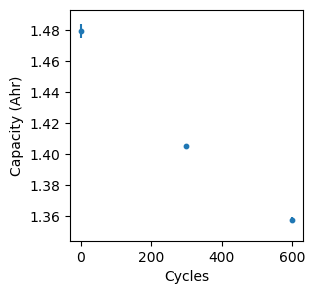

In [5]:
# Compiling the mean capacities and standard deviations at 0, 300, and 600 cycle cells
fresh_capacities = np.array([fresh_capacity_51.max(),fresh_capacity_52.max(), fresh_capacity_53.max(),fresh_capacity_54.max()])
fresh_capacities_avg, fresh_capacities_std = np.mean(fresh_capacities), np.std(fresh_capacities)

aged300_capacities = np.array([aged_300_capacity_1.max(), aged_300_capacity_2.max(),aged_300_capacity_3.max(), aged_300_capacity_4.max()])
aged300_capacities_avg, aged300_capacities_std = np.mean(aged300_capacities), np.std(aged300_capacities)

aged600_capacities = np.array([aged_600_capacity_49.max(),aged_600_capacity_50.max()])
aged600_capacities_avg, aged600_capacities_std = np.mean(aged600_capacities), np.std(aged600_capacities)

cycles = [0, 300, 600]
cap_avgs = [fresh_capacities_avg, aged300_capacities_avg, aged600_capacities_avg]
cap_stds = [fresh_capacities_std, aged300_capacities_std, aged600_capacities_std]

# Plotting
fig = plt.figure(figsize = (3,3))
plt.scatter(x=cycles, y=cap_avgs,s=10)
plt.errorbar(x=cycles, y=cap_avgs, xerr=None, yerr=cap_stds, fmt='none')

plt.xlabel('Cycles')
plt.ylabel('Capacity (Ahr)')

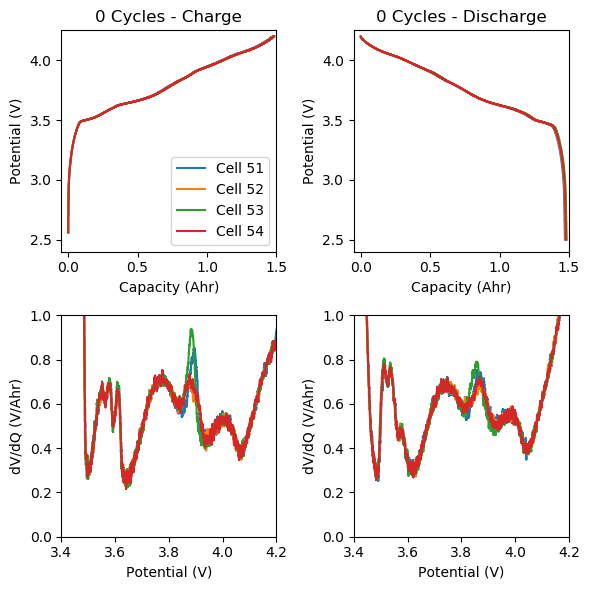

In [6]:
# Comparing capacity and differential voltage for each replicate of the 0 cycle cells
fresh_capacity_c_list = [fresh_capacity_51, fresh_capacity_52, fresh_capacity_53, fresh_capacity_54]
fresh_voltage_c_list = [fresh_voltage_51, fresh_voltage_52, fresh_voltage_53, fresh_voltage_54]
fresh_dvdq_c_list = [fresh_dvdq_51, fresh_dvdq_52, fresh_dvdq_53, fresh_dvdq_54]

fresh_capacity_d_list = [fresh_capacity_51d, fresh_capacity_52d, fresh_capacity_53d, fresh_capacity_54d]
fresh_voltage_d_list = [fresh_voltage_51d, fresh_voltage_52d, fresh_voltage_53d, fresh_voltage_54d]
fresh_dvdq_d_list = [fresh_dvdq_51d, fresh_dvdq_52d, fresh_dvdq_53d, fresh_dvdq_54d]
labels = ['Cell 51', 'Cell 52', 'Cell 53', 'Cell 54']

fig = plt.figure(figsize = (6,6))
ax, ax2, ax3, ax4 = fig.add_subplot(221), fig.add_subplot(222), fig.add_subplot(223), fig.add_subplot(224)

for i in (ax, ax2):
    i.set_xlabel('Capacity (Ahr)')
    i.set_ylabel('Potential (V)')
    i.set_xlim(-0.05, 1.5)
    i.set_ylim(2.4, 4.25)
    
for i in (ax3, ax4):
    i.set_xlim(3.4, 4.2)
    i.set_ylim(0,1)
    i.set_xlabel('Potential (V)')
    i.set_ylabel('dV/dQ (V/Ahr)')

for i in range(0,len(fresh_capacity_c_list)):
    ax.plot(fresh_capacity_c_list[i], fresh_voltage_c_list[i], label=labels[i])
    ax2.plot(fresh_capacity_d_list[i], fresh_voltage_d_list[i], label=labels[i])    
    ax3.plot(fresh_voltage_c_list[i], fresh_dvdq_c_list[i], label=labels[i])
    ax4.plot(fresh_voltage_d_list[i], -fresh_dvdq_d_list[i], label=labels[i])

ax.legend(loc=4)
ax.set_title('0 Cycles - Charge')
ax2.set_title('0 Cycles - Discharge')
plt.tight_layout()

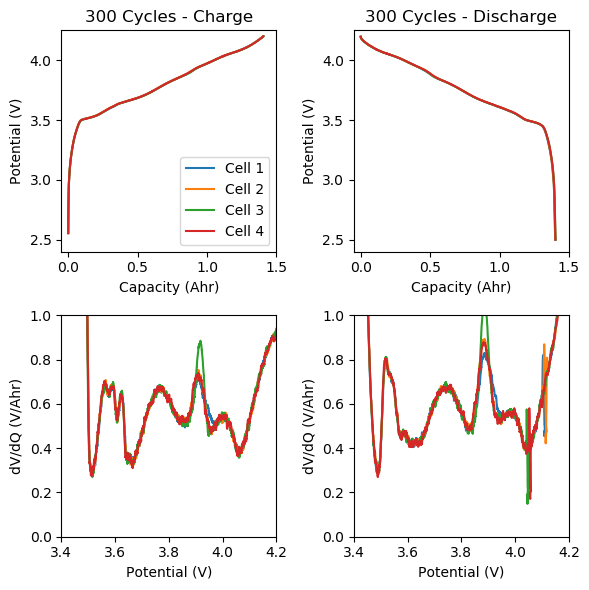

In [7]:
# Comparing capacity and differential voltage for each replicate of the 300 cycle cells
aged_300_capacity_c_list = [aged_300_capacity_1, aged_300_capacity_2, aged_300_capacity_3, aged_300_capacity_4]
aged_300_voltage_c_list = [aged_300_voltage_1, aged_300_voltage_2, aged_300_voltage_3, aged_300_voltage_4]
aged_300_dvdq_c_list = [aged_300_dvdq_1, aged_300_dvdq_2, aged_300_dvdq_3, aged_300_dvdq_4]

aged_300_capacity_d_list = [aged_300_capacity_1d, aged_300_capacity_2d, aged_300_capacity_3d, aged_300_capacity_4d]
aged_300_voltage_d_list = [aged_300_voltage_1d, aged_300_voltage_2d, aged_300_voltage_3d, aged_300_voltage_4d]
aged_300_dvdq_d_list = [aged_300_dvdq_1d, aged_300_dvdq_2d, aged_300_dvdq_3d, aged_300_dvdq_4d]
labels = ['Cell 1', 'Cell 2', 'Cell 3', 'Cell 4']

fig = plt.figure(figsize = (6,6))
ax, ax2, ax3, ax4 = fig.add_subplot(221), fig.add_subplot(222), fig.add_subplot(223), fig.add_subplot(224)

for i in (ax, ax2):
    i.set_xlabel('Capacity (Ahr)')
    i.set_ylabel('Potential (V)')
    i.set_xlim(-0.05, 1.5)
    i.set_ylim(2.4, 4.25)
    
for i in (ax3, ax4):
    i.set_xlim(3.4, 4.2)
    i.set_ylim(0,1)
    i.set_xlabel('Potential (V)')
    i.set_ylabel('dV/dQ (V/Ahr)')

for i in range(0,len(aged_300_capacity_c_list)):
    ax.plot(aged_300_capacity_c_list[i], aged_300_voltage_c_list[i], label=labels[i])
    ax2.plot(aged_300_capacity_d_list[i], aged_300_voltage_d_list[i], label=labels[i])    
    ax3.plot(aged_300_voltage_c_list[i], aged_300_dvdq_c_list[i], label=labels[i])
    ax4.plot(aged_300_voltage_d_list[i], -aged_300_dvdq_d_list[i], label=labels[i])

ax.legend(loc=4)
ax.set_title('300 Cycles - Charge')
ax2.set_title('300 Cycles - Discharge')
plt.tight_layout()

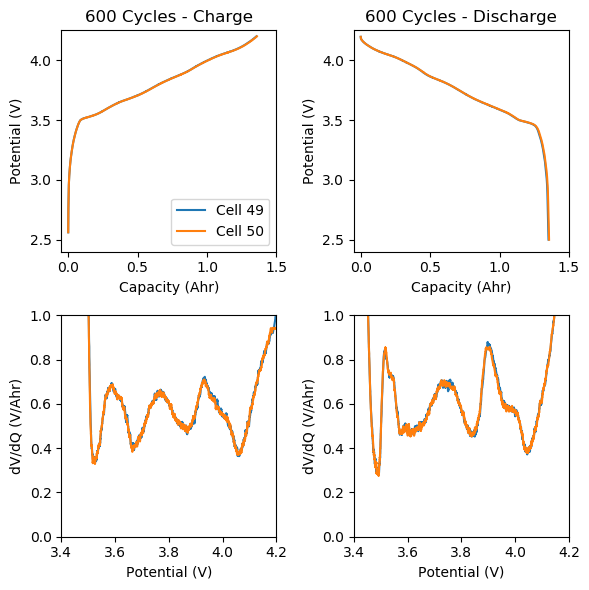

In [8]:
# Comparing capacity and differential voltage for each replicate of the 600 cycle cells
aged_600_capacity_c_list = [aged_600_capacity_49, aged_600_capacity_50]
aged_600_voltage_c_list = [aged_600_voltage_49, aged_600_voltage_50]
aged_600_dvdq_c_list = [aged_600_dvdq_49, aged_600_dvdq_50]

aged_600_capacity_d_list = [aged_600_capacity_49d, aged_600_capacity_50d]
aged_600_voltage_d_list = [aged_600_voltage_49d, aged_600_voltage_50d]
aged_600_dvdq_d_list = [aged_600_dvdq_49d, aged_600_dvdq_50d]
labels = ['Cell 49', 'Cell 50']

fig = plt.figure(figsize = (6,6))
ax, ax2, ax3, ax4 = fig.add_subplot(221), fig.add_subplot(222), fig.add_subplot(223), fig.add_subplot(224)

for i in (ax, ax2):
    i.set_xlabel('Capacity (Ahr)')
    i.set_ylabel('Potential (V)')
    i.set_xlim(-0.05, 1.5)
    i.set_ylim(2.4, 4.25)
    
for i in (ax3, ax4):
    i.set_xlim(3.4, 4.2)
    i.set_ylim(0,1)
    i.set_xlabel('Potential (V)')
    i.set_ylabel('dV/dQ (V/Ahr)')

for i in range(0,len(aged_600_capacity_c_list)):
    ax.plot(aged_600_capacity_c_list[i], aged_600_voltage_c_list[i], label=labels[i])
    ax2.plot(aged_600_capacity_d_list[i], aged_600_voltage_d_list[i], label=labels[i])    
    ax3.plot(aged_600_voltage_c_list[i], aged_600_dvdq_c_list[i], label=labels[i])
    ax4.plot(aged_600_voltage_d_list[i], -aged_600_dvdq_d_list[i], label=labels[i])
    
ax.legend(loc=4)
ax.set_title('600 Cycles - Charge')
ax2.set_title('600 Cycles - Discharge')
plt.tight_layout()

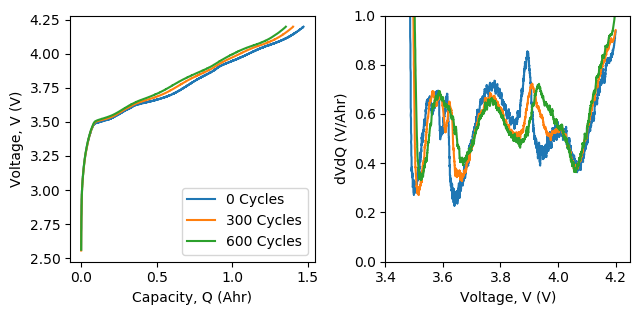

In [9]:
fig = plt.figure(figsize=(6.5,3.25))
ax, ax2 = fig.add_subplot(121), fig.add_subplot(122)

ax.plot(fresh_capacity_51, fresh_voltage_51, label='0 Cycles')
ax.plot(aged_300_capacity_1, aged_300_voltage_1, label='300 Cycles')
ax.plot(aged_600_capacity_49, aged_600_voltage_49, label='600 Cycles')

ax2.plot(fresh_voltage_51, fresh_dvdq_51)
ax2.plot(aged_300_voltage_1, aged_300_dvdq_1)
ax2.plot(aged_600_voltage_49, aged_600_dvdq_49)

ax.set_xlabel('Capacity, Q (Ahr)')
ax.set_ylabel('Voltage, V (V)')
ax.legend()

ax2.set_xlabel('Voltage, V (V)')
ax2.set_ylabel('dVdQ (V/Ahr)')
ax2.set_xlim(3.4, 4.25)
ax2.set_ylim(0,1)

plt.tight_layout()

fig.savefig('../figures/Figures SI/Cycle_Comparison_Charged.png', dpi = 300)

<a id='Half-Cell-Models'></a>

## Half Cell Models
<p>&nbsp;</p>

[Back To Top](#top)

In [10]:
# Assuming NMC capacity is ~ 180 mAh, LiMNO is 130
# We collected XRD and EPS data to show us that our electrodes are roughly 66% NMC and 34% LMO
# From measurements, we estimate true insertion positive electrode capacity to be 1.8 Ahr.
# Assuming an N-P Ratio of 1.1

nmc_cap, lmo_cap = 200, 120 # mAh/g # , 120 mAh/g # Source = Nitta (2017)
nmc_mass_percent, lmo_mass_percent = 0.66, 0.34
pos_q, n_p = 1.8, 1.1
neg_q = pos_q*n_p
nor_pos, nor_neg = 6, 6

nmc_cap_percent = (nmc_mass_percent*nmc_cap)/(nmc_mass_percent*nmc_cap + lmo_mass_percent*lmo_cap)
lmo_cap_percent = (lmo_mass_percent*lmo_cap)/(nmc_mass_percent*nmc_cap + lmo_mass_percent*lmo_cap)

# Base parameters from Verbrugge et al. (2017)
blend_matrix = np.array([3.62274, 0.13442*nmc_cap_percent*pos_q, 0.96710,
                         3.72645, 0.32460*nmc_cap_percent*pos_q, 1.39712,
                         3.90575, 0.21118*nmc_cap_percent*pos_q, 3.50500,
                         4.22955, 0.32980*nmc_cap_percent*pos_q, 5.52757,
                         4.01173, 0.55070*lmo_cap_percent*pos_q, 1.52000,
                         4.14902, 0.44930*lmo_cap_percent*pos_q, 0.93000])

graphite_matrix = np.array([0.08843, 0.43336*neg_q, 0.08611,
                            0.12799, 0.23963*neg_q, 0.08009,
                            0.14331, 0.15018*neg_q, 0.72469,
                            0.16984, 0.05462*neg_q, 2.53277,
                            0.21446, 0.06744*neg_q, 0.09470,
                            0.36325, 0.05476*neg_q, 5.97354])

# Total parameter matrix
params = np.append(blend_matrix.flatten(), graphite_matrix.flatten())

Visualizing electrode reactions and the underlying reactions that make up the summed curves

G:\My Drive\A- Research\github\msmr-whole-cell-manuscript\jupyter\utilities\msmr.py:83: RuntimeWarning: overflow encountered in square
  dxjdu = (-Xj/w)*((f*np.exp(f*(U-U0)/w))/(1+np.exp(f*(U-U0)/w))**2)


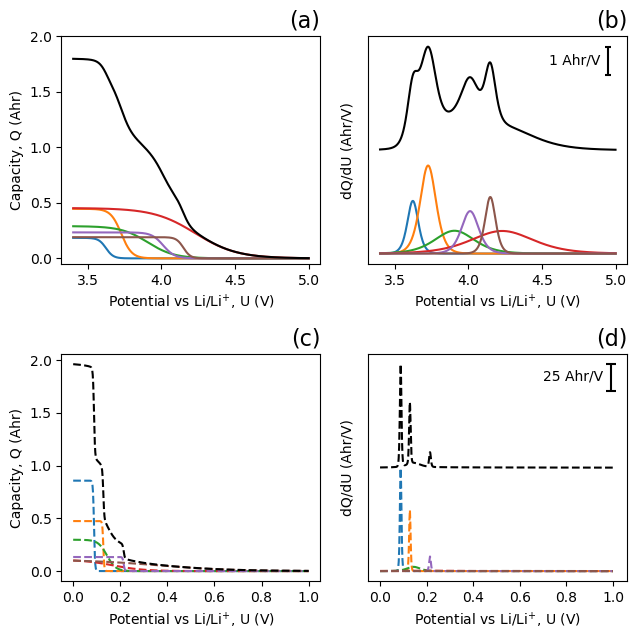

In [11]:
p_vrange = np.linspace(3.4, 5, 500)
n_vrange = np.linspace(0, 1, 500)

indvd_rxn_caps, indvd_rxn_dqdus = {}, {}
indvd_rxn_caps['pos'], indvd_rxn_caps['neg'] = {}, {}
indvd_rxn_dqdus['pos'], indvd_rxn_dqdus['neg'] = {}, {}
# For this case, we are using one for loop since nor_pos = nor_neg
# Solving for each qj, and dqjdu for each reaction and storing them in dictionary for easier recall
for i in range(0, nor_pos):
    indvd_rxn_caps['pos'][i+1], indvd_rxn_dqdus['pos'][i+1] = msmr.individual_reactions(p_vrange,
                                                                                        blend_matrix[0+(i*3)],
                                                                                        blend_matrix[1+(i*3)],
                                                                                        blend_matrix[2+(i*3)], 298)
    indvd_rxn_caps['neg'][i+1], indvd_rxn_dqdus['neg'][i+1] = msmr.individual_reactions(n_vrange,
                                                                                        graphite_matrix[0+(i*3)],
                                                                                        graphite_matrix[1+(i*3)],
                                                                                        graphite_matrix[2+(i*3)], 298)
# Calculating electrode response using the same parameters for easier recall
pos_whole = msmr.electrode_response(blend_matrix, 298, 3.4, 5, 6)
neg_whole = msmr.electrode_response(graphite_matrix, 298, 0, 1, 6)

# Plotting
fig = plt.figure(figsize = (6.5, 6.5))
ax1, ax2, ax3, ax4 = fig.add_subplot(221),fig.add_subplot(222),fig.add_subplot(223),fig.add_subplot(224)
axes=[ax1, ax2, ax3, ax4]
labels=['(a)', '(b)', '(c)', '(d)']

# Using plotting function to create figure
mp.all_electrode_curves(p_vrange, indvd_rxn_caps['pos'], indvd_rxn_dqdus['pos'], ax1, ax2, pos_whole,
                     True, 1, 4.55, 4.95, 4.949)
mp.all_electrode_curves(n_vrange, indvd_rxn_caps['neg'], indvd_rxn_dqdus['neg'], ax3, ax4, neg_whole,
                     False, 25, 0.7, 0.99, 0.991)

for idx, ax in enumerate(axes):
    ax.set_title(labels[idx], fontsize=16, loc='right')

ax1.set_ylim(-0.05,2)
ax1.set_yticks([0, 0.5, 1, 1.5, 2])

fig.tight_layout()

# plt.savefig('../figures/Figure 1/Figure1.eps', dpi = 300, format='eps')
# plt.savefig('../figures/Figure 1/Figure1.pdf', dpi = 300, format='pdf')
# plt.savefig('../figures/Figure 1/Figure1.png', dpi = 300, format='png')

### Initial Whole Cell MSMR Model

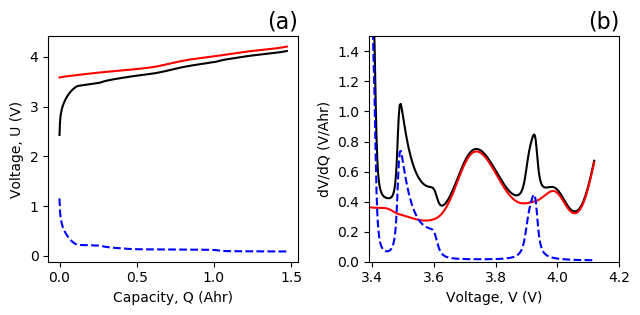

In [12]:
# Using all_output setting to get both electrode information out of MSMR model
results = msmr.whole_cell(parameter_matrix=params, nor_pos = 6, nor_neg = 6,
                          pos_lower_li_limit = 0.27, neg_lower_li_limit=0.0,
                          temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1),
                          usable_cap = fresh_capacity_51.max(), Qj_or_Xj='Qj', 
                          n_p=None, p_capacity=None, all_output=True)

capacities, voltages, dqdus, dvdqs = results[0], results[1], results[2], results[3]
fig = plt.figure(figsize = (6.5, 3.25))
ax, ax2 = fig.add_subplot(121), fig.add_subplot(122)

ax.plot(capacities[0], voltages[0], label='Whole Cell', color='k')
ax.plot(np.flip(capacities[0]), voltages[1], label='Positive', color='r')
ax.plot(capacities[0], voltages[2], label='Negative', ls='--', color='b')
ax.set_xlabel('Capacity, Q (Ahr)')
ax.set_ylabel('Voltage, U (V)')

ax2.plot(voltages[0], -dvdqs[0], label='Whole Cell', color='k')
ax2.plot(np.flip(voltages[0]), -dvdqs[1], label='Positive', color='r')
ax2.plot(voltages[0], -dvdqs[2], label='Negative', ls='--', color='b')
ax2.set_xlabel('Voltage, V (V)')
ax2.set_ylabel('dV/dQ (V/Ahr)')

ax2.set_xlim(3.39, 4.2)
ax2.set_ylim(0,1.5)

ax.set_title('(a)', loc='right', fontsize=16)
ax2.set_title('(b)', loc='right', fontsize=16)

plt.tight_layout()
# plt.savefig('../figures/Figure 2/Figure2.eps', dpi = 300, format='eps')
# plt.savefig('../figures/Figure 2/Figure2.pdf', dpi = 300, format='pdf')
# plt.savefig('../figures/Figure 2/Figure2.png', dpi = 300, format='png')

<a id='Fresh-Cell-Fit-and-Comparisons'></a>

## Fresh Cell Fit and Comparisons

<p>&nbsp;</p>

[Back To Top](#top)

In [13]:
# Fresh guess for the charge data
pos_c = 1.8
neg_c = 1.98

# Take the Xj form of the initial guess and multiply it by the initial guesses of the 
# total electrode capacities

fresh_guess = np.array([3.6827400e+00, 1.0268194e-01*pos_c, 9.6710000e-01, # Positive Electrode
                        3.7264500e+00, 2.4795833e-01*pos_c, 1.3971200e+00, 
                        3.9057500e+00, 1.6131806e-01*pos_c, 3.5050000e+00, 
                        4.2605500e+00, 2.5193056e-01*pos_c, 5.5275700e+00,
                        4.0117300e+00, 1.3002639e-01*pos_c, 1.5200000e+00, 
                        4.1690200e+00, 1.0608472e-01*pos_c, 9.3000000e-01, 
                        
                        7.5430000e-02, 5.4137000e-01*neg_c, 8.6110000e-02, # Negative Electrode
                        1.0299000e-01, 2.8463000e-01*neg_c, 8.0090000e-02,
                        1.2431000e-01, 2.4680000e-02*neg_c, 1.5000000e-01, 
                        1.4634000e-01, 2.7120000e-02*neg_c, 1.7500000e-01, 
                        1.6846000e-01, 6.7440000e-02*neg_c, 1.2200000e-01, 
                        3.6325000e-01, 5.4760000e-02*neg_c, 5.9735400e+00,
                        
                        1.5000000e-01*pos_c, 5.0000000e-03*neg_c]) # Lower Lithiation Bounds

In [14]:
# Bounds for each parameter
fresh_ocv_bounds = []
for i in range(0,int(nor_pos+nor_neg)):
    fresh_ocv_bounds.append((fresh_guess[i*3] - 0.02, fresh_guess[i*3] + 0.02))
    fresh_ocv_bounds.append((fresh_guess[i*3 + 1]*0.75, fresh_guess[i*3 + 1]*1.25))
    fresh_ocv_bounds.append((fresh_guess[i*3 + 2]*0.75, fresh_guess[i*3 + 2]*1.25))

fresh_ocv_bounds.append((0.18, 0.27))
fresh_ocv_bounds.append((0, 0.0108))
    
fresh_ocv_bounds[13] = (fresh_guess[13]*0.95, fresh_guess[13]*1.05)
fresh_ocv_bounds[16] = (fresh_guess[16]*0.95, fresh_guess[16]*1.05)

# Fitting
yvolt0_51c = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=fresh_guess, 
                        args=(voltage_range_c,             # interpolated voltage range
                              data_cap_interp_51,       # interpolated capacity data
                              data_dvdq_interp_51,     # interpolated dvdq data
                              fresh_voltage_51.min(),   # Minimum voltage
                              fresh_voltage_51.max(),   # Maximum voltage
                              298,                       # temperature
                              6, 6,                      # number of pos rxns, number of neg rxns
                              (3.4,5), (0,1),            # positive voltage range, negative voltange range
                              0.27, 0.0,                 # positive | neg lower X or Q limit
                              None,                      # N|P Ratio
                              None,                      # positive electrode full capacity
                              fresh_capacity_51.max(),  # usable/cyclable capacity within the voltage limits
                              'Qj', 'MAE',              # Qj or Xj
                              None,                      # list of pos_U0s
                              None,                      # list of neg_U0s
                              False, True,               # fixed voltage | fixed Xj or Qj limit
                              0.0, 1.0),                 # capacity vs dvdq weight on error function
                        eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                        bounds=fresh_ocv_bounds, iter=500, full_output=False)

print(yvolt0_51c)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.05257650380770897
            Iterations: 74
            Function evaluations: 3009
            Gradient evaluations: 74
[3.67345131 0.23103436 0.725325   3.73562938 0.55790624 1.30801423
 3.90484598 0.23930695 2.62875    4.2800935  0.5338638  6.11776427
 4.02046733 0.22234513 1.53945292 4.15868603 0.18140487 1.12414459
 0.08188418 0.98336609 0.1076375  0.11177796 0.55152985 0.1001125
 0.1369909  0.061083   0.1875     0.16167817 0.05953761 0.21875
 0.18846    0.15360212 0.1525     0.34325    0.0813186  4.480155
 0.27       0.0099    ]


In [15]:
# Solving MSMR model for charge and discharged initial guesses and resultant fits 
guess_full_0_51c = yvolt0_51c[0:(3*(nor_pos+nor_neg))]

# Verbrugge et al. (2017) Base Parameters
cap_verb, v_verb, dqdu_verb, dvdq_verb = msmr.whole_cell(parameter_matrix=params, nor_pos = 6, 
                                                         nor_neg = 6, pos_lower_li_limit = 0.27, 
                                                         neg_lower_li_limit=0.0, temp = 298, n_p=None, p_capacity=None,
                                                         pos_volt_range = (3.4, 5), neg_volt_range = (0, 1), 
                                                         usable_cap = fresh_capacity_51.max(), Qj_or_Xj='Qj')

# Charged - Initial Guess
cap_g_c, v_g_c, dqdu_g_c, dvdq_g_c = msmr.whole_cell(fresh_guess, nor_pos = 6, nor_neg = 6,
                                                     pos_lower_li_limit = 0.27, neg_lower_li_limit=0.0,
                                                     temp = 298, pos_volt_range = (3.4, 5), 
                                                     neg_volt_range = (0, 1), p_capacity=None, n_p=None,
                                                     usable_cap = fresh_capacity_51.max(), Qj_or_Xj='Qj')
# Charged - Fit
cap0_51c, v0_51c, dqdu0_51c, dvdq0_51c = msmr.whole_cell(guess_full_0_51c, nor_pos = 6, nor_neg = 6,
                                                         pos_lower_li_limit = 0.27, neg_lower_li_limit=0.0,
                                                         temp = 298, pos_volt_range = (3.4, 5), 
                                                         neg_volt_range = (0, 1), p_capacity=None, n_p=None,
                                                         usable_cap = fresh_capacity_51.max(), Qj_or_Xj='Qj')

# Charged (MAE)
capacity_range0_51 = np.linspace(fresh_capacity_51.min(), fresh_capacity_51.max(), 251)
verb_mae = msmr.mae(fresh_voltage_51, v_verb, cap_verb, fresh_capacity_51, capacity_range0_51)
guess_mae = msmr.mae(fresh_voltage_51, v_g_c, cap_g_c, fresh_capacity_51, capacity_range0_51)
fit0_51_mae_c = msmr.mae(fresh_voltage_51, v0_51c, cap0_51c, fresh_capacity_51, capacity_range0_51)
ocv_mae_list_c = [verb_mae, guess_mae, fit0_51_mae_c]

deriv_list = [(v_verb, dvdq_verb), (v_g_c, dvdq_g_c), (v0_51c, dvdq0_51c)]
deriv_mae_list_c = [msmr.mae(fresh_dvdq_51, -(item[1]), item[0], fresh_voltage_51, np.linspace(3.49, 4.15, 1000)) for item in deriv_list]

C:\Users\victo\Anaconda3\envs\msmr\lib\site-packages\scipy\interpolate\interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
C:\Users\victo\Anaconda3\envs\msmr\lib\site-packages\scipy\interpolate\interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


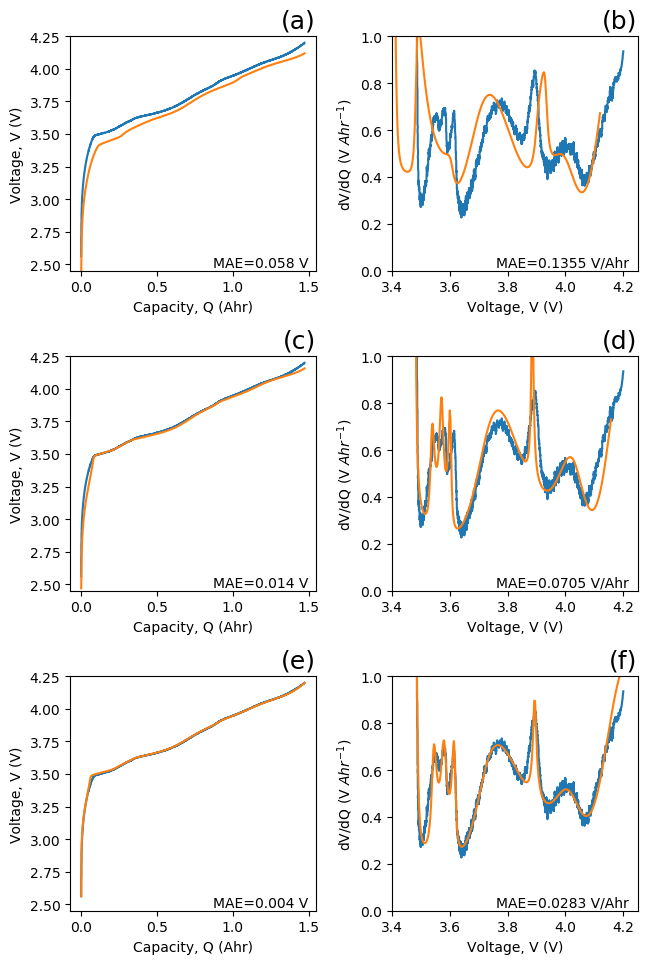

In [16]:
# Charged
fig = plt.figure(figsize=(6.5, 9.75))

ax, ax2 = fig.add_subplot(321), fig.add_subplot(322) # First Row
ax3, ax4 = fig.add_subplot(323), fig.add_subplot(324) # Second Row
ax5, ax6 = fig.add_subplot(325), fig.add_subplot(326) # Third Row
axes, axes_left, axes_right = [ax, ax2, ax3, ax4, ax5, ax6], [ax, ax3, ax5], [ax2, ax4, ax6] 

letters = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']
for idx, axe in enumerate(axes):
    axe.set_title(letters[idx], loc='right', fontsize = 18)
    
for idx, axe in enumerate(axes_left):
    axe.plot(fresh_capacity_51, fresh_voltage_51, label='Data')
    axe.set_xlabel('Capacity, Q (Ahr)')
    axe.set_ylabel('Voltage, V (V)')
    axe.text(.87, 2.48, 'MAE=%1.3f V' %ocv_mae_list_c[idx])
    axe.set_ylim(2.45, 4.25)
    
for idx, axe in enumerate(axes_right):
    axe.plot(fresh_voltage_51, fresh_dvdq_51, label='Data')
    axe.set_xlabel('Voltage, V (V)')
    axe.set_ylabel('dV/dQ (V $Ahr^{-1})$')
    axe.set_xlim(3.4, 4.25)
    axe.set_ylim(0, 1)
    axe.text(3.76, 0.02, 'MAE=%1.4f V/Ahr' %deriv_mae_list_c[idx])

# Capacity vs OCV 
ax.plot(cap_verb, v_verb)
ax3.plot(cap_g_c, v_g_c)
ax5.plot(cap0_51c, v0_51c)

# OCV vs dV/dQ
ax2.plot(v_verb, -dvdq_verb)
ax4.plot(v_g_c, -dvdq_g_c)
ax6.plot(v0_51c, -dvdq0_51c)

fig.tight_layout()
# plt.savefig('../figures/Figure 3/Figure3.eps', dpi = 300, format='eps')
# plt.savefig('../figures/Figure 3/Figure3.pdf', dpi = 300, format='pdf')
# plt.savefig('../figures/Figure 3/Figure3.png', dpi = 300, format='png')

<a id='Fitting-300-and-600-Cycles'></a>

## Fitting 300 and 600 Cycles  

<p>&nbsp;</p>

[Back To Top](#top)

In [17]:
# Charge - 300 Cycles

# Setting bounds for each parameter
aged_300_ocv_bounds = []
for i in range(0,int(nor_pos+nor_neg)):
    aged_300_ocv_bounds.append((yvolt0_51c[i*3] - 0.02, yvolt0_51c[i*3] + 0.02))
    aged_300_ocv_bounds.append((yvolt0_51c[i*3 + 1]*0.75, yvolt0_51c[i*3 + 1]*1.25))
    aged_300_ocv_bounds.append((yvolt0_51c[i*3 + 2]*0.75, yvolt0_51c[i*3 + 2]*1.25))

aged_300_ocv_bounds.append((0.2106, 0.27))
aged_300_ocv_bounds.append((0, 0.0108))
    
yvolt300_1c = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=yvolt0_51c, 
                         args=(voltage_range_c,        # interpolated voltage range
                               a300_data_cap_interp_1,      # interpolated capacity data
                               a300_data_dvdq_interp_1,     # interpolated dvdq data
                               aged_300_voltage_1.min(),  # Minimum voltage
                               aged_300_voltage_1.max(),  # Maximum voltage
                               298,                  # temperature
                               6, 6,                 # number of pos rxns, number of neg rxns
                               (3.4,5), (0,1),       # positive voltage range, negative voltange range
                               None,                 # positive lower X limit
                               None,                 # negative lower X limit
                               None,                 # N|P Ratio
                               None,                 # positive electrode full capacity
                               aged_300_capacity_1.max(), # usable/cyclable capacity within the voltage limits
                               'Qj', 'MAE',         # Qj or Xj
                               None,                 # list of pos_U0s
                               None,                 # list of neg_U0s
                               False,                # fixed voltage
                               False,                 # fixed xj_limit
                               0.0,                  # capacity weight on error function
                               1.0),                 # dvdq weight on error function
                         eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                         bounds=aged_300_ocv_bounds, iter=500, full_output=False)

print(yvolt300_1c)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.03938040542924459
            Iterations: 94
            Function evaluations: 3823
            Gradient evaluations: 94
[3.68838308e+00 2.88792956e-01 5.43993750e-01 3.75562938e+00
 4.18699450e-01 1.27714357e+00 3.92484598e+00 1.97200845e-01
 2.59866020e+00 4.26009350e+00 5.56651015e-01 7.60912522e+00
 4.00046733e+00 2.10675960e-01 1.92431615e+00 4.14942505e+00
 2.07057812e-01 1.29095991e+00 8.16761604e-02 8.11414108e-01
 1.34546875e-01 1.12403085e-01 5.35294938e-01 1.18526073e-01
 1.37083941e-01 5.94209558e-02 1.99133041e-01 1.60156879e-01
 6.55142981e-02 2.73437500e-01 1.87177099e-01 1.41624210e-01
 1.79876995e-01 3.60086388e-01 1.01648250e-01 5.34894003e+00
 2.70000000e-01 5.81328762e-05]


In [18]:
# 600 Cycles
# Setting bounds for each parameter
aged_600_ocv_bounds = []

for i in range(0,int(nor_pos+nor_neg)):
    aged_600_ocv_bounds.append((yvolt300_1c[i*3] - 0.01, yvolt300_1c[i*3] + 0.01))
    aged_600_ocv_bounds.append((yvolt300_1c[i*3 + 1]*0.75, yvolt300_1c[i*3 + 1]*1.25))
    aged_600_ocv_bounds.append((yvolt300_1c[i*3 + 2]*0.75, yvolt300_1c[i*3 + 2]*1.25))

aged_600_ocv_bounds.append((0.095, yvolt300_1c[-2]))
aged_600_ocv_bounds.append((0, yvolt300_1c[-1]))

yvolt600_49c = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=yvolt300_1c, 
                          args=(voltage_range_c,        # interpolated voltage range
                                a600_data_cap_interp_49,      # interpolated capacity data
                                a600_data_dvdq_interp_49,     # interpolated dvdq data
                                aged_600_voltage_49.min(),  # Minimum voltage
                                aged_600_voltage_49.max(),  # Maximum voltage
                                298,                  # temperature
                                6, 6,                 # number of pos rxns, number of neg rxns
                                (3.4,5), (0,1),       # positive voltage range, negative voltange range
                                None,                 # positive lower X limit
                                None,                 # negative lower X limit
                                None,                 # N|P Ratio
                                None,                 # positive electrode full capacity
                                aged_600_capacity_49.max(), # usable/cyclable capacity within the voltage limits
                               'Qj', 'MAE',          # Qj or Xj
                                None,                 # list of pos_U0s
                                None,                 # list of neg_U0s
                                False,                # fixed voltage
                                False,                 # fixed xj_limit
                                0.0,                  # capacity weight on error function
                                1.0),                 # dvdq weight on error function
                          eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                          bounds=aged_600_ocv_bounds, iter=500, full_output=False)

print(yvolt600_49c)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.02709096424151454
            Iterations: 90
            Function evaluations: 3649
            Gradient evaluations: 90
[3.69681356e+00 2.16594717e-01 4.34095079e-01 3.76562938e+00
 4.00845505e-01 1.47075527e+00 3.93484598e+00 1.95124284e-01
 2.67876668e+00 4.25009350e+00 6.02152445e-01 5.70684391e+00
 3.99046733e+00 1.76040346e-01 1.59990986e+00 4.14458476e+00
 1.55293359e-01 9.93492067e-01 8.18144288e-02 1.01426764e+00
 1.68183594e-01 1.16343194e-01 5.24101362e-01 1.33431679e-01
 1.37360478e-01 6.29169349e-02 2.48916302e-01 1.57869575e-01
 7.51751847e-02 3.41796875e-01 1.82976249e-01 1.37280999e-01
 2.24846244e-01 3.50086388e-01 1.01499880e-01 4.84614565e+00
 2.70000000e-01 4.95938838e-08]


In [19]:
# charged Fits

# MSMR Results for Charged 300 cycle fit
guess_full_300_1c = yvolt300_1c[0:(3*(nor_pos+nor_neg))]
cap300_1c, v300_1c, dqdu300_1c, dvdq300_1c = msmr.whole_cell(guess_full_300_1c, nor_pos = 6, nor_neg = 6, 
                                                           pos_lower_li_limit = yvolt300_1c[-2], neg_lower_li_limit = yvolt300_1c[-1],
                                                           temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1), 
                                                           usable_cap = aged_300_capacity_1.max(), n_p=None, p_capacity=None,
                                                        Qj_or_Xj='Qj')
# MSMR Results for Charged 600 cycle fit
guess_full_600_49c = yvolt600_49c[0:(3*(nor_pos+nor_neg))]
cap600_49c, v600_49c, dqdu600_49c, dvdq600_49c = msmr.whole_cell(guess_full_600_49c, nor_pos = 6, nor_neg = 6, 
                                                               pos_lower_li_limit = yvolt600_49c[-2], neg_lower_li_limit = yvolt600_49c[-1],
                                                               temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1), 
                                                               usable_cap = aged_600_capacity_49.max(), n_p=None, p_capacity=None,
                                                                Qj_or_Xj='Qj')

capacity_range300_1 = np.linspace(0.0, aged_300_capacity_1.max(), 1000)
capacity_range600_49 = np.linspace(0.0, aged_600_capacity_49.max(), 1000)

# Calculating MAE for capcity and dV/dQ data
fit300_1_mae_c = msmr.mae(aged_300_voltage_1, v300_1c, cap300_1c, aged_300_capacity_1, capacity_range300_1)
fit600_49_mae_c = msmr.mae(aged_600_voltage_49, v600_49c, cap600_49c, aged_600_capacity_49, capacity_range600_49)
ocv_mae_list_all = [fit0_51_mae_c, fit300_1_mae_c, fit600_49_mae_c]

deriv_list = [(v0_51c, dvdq0_51c, fresh_voltage_51, fresh_dvdq_51),
              (v300_1c, dvdq300_1c, aged_300_voltage_1, aged_300_dvdq_1),
              (v600_49c, dvdq600_49c, aged_600_voltage_49, aged_600_dvdq_49)]
deriv_mae_list_all = [msmr.mae(item[3], -(item[1]), item[0], item[2], voltage_range_c) for item in deriv_list]

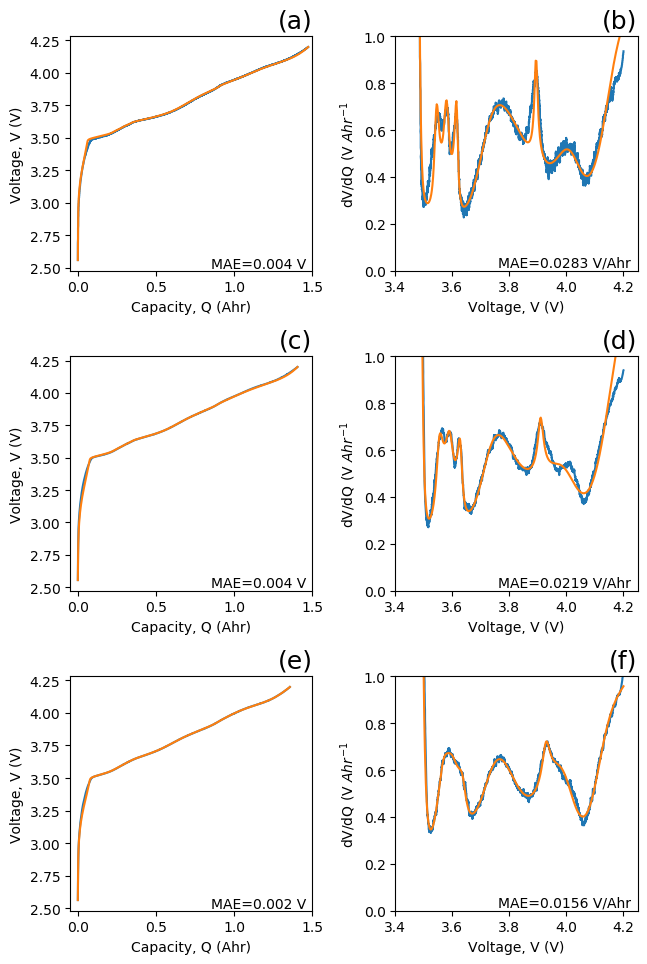

In [20]:
# Plotting
fig = plt.figure(figsize=(6.5, 9.75))
ax, ax2 = fig.add_subplot(321), fig.add_subplot(322)
ax3, ax4 = fig.add_subplot(323), fig.add_subplot(324)
ax5, ax6 = fig.add_subplot(325), fig.add_subplot(326)
axes, axes_left, axes_right = [ax, ax2, ax3, ax4, ax5, ax6], [ax, ax3, ax5], [ax2, ax4, ax6]
letters = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

for idx, axe in enumerate(axes):
    axe.set_title(letters[idx], loc='right', fontsize = 18)

# Capacity vs OCV 
ax.plot(fresh_capacity_51, fresh_voltage_51, label='Data')
ax.plot(cap0_51c, v0_51c, label='Fit')

ax3.plot(aged_300_capacity_1, aged_300_voltage_1, label='Data')
ax3.plot(cap300_1c, v300_1c, label='Fit')

ax5.plot(aged_600_capacity_49, aged_600_voltage_49, label='Data')
ax5.plot(cap600_49c, v600_49c, label='Fit')

# OCV vs dV/dQ
ax2.plot(fresh_voltage_51, fresh_dvdq_51, label='Data')
ax2.plot(v0_51c, -dvdq0_51c, label='Fit')

ax4.plot(aged_300_voltage_1, aged_300_dvdq_1, label='Data')
ax4.plot(v300_1c, -dvdq300_1c, label='Fit')

ax6.plot(aged_600_voltage_49, aged_600_dvdq_49, label='Data')
ax6.plot(v600_49c, -dvdq600_49c, label='Fit')

for idx, axe in enumerate(axes_left):
    axe.set_xlabel('Capacity, Q (Ahr)')
    axe.set_ylabel('Voltage, V (V)')
    axe.text(.85, 2.5, 'MAE=%1.3f V' %ocv_mae_list_all[idx])
    axe.set_xlim(-0.05, 1.5)
    
for idx, axe in enumerate(axes_right):
    axe.set_xlabel('Voltage, V (V)')
    axe.set_ylabel('dV/dQ (V $Ahr^{-1}$')
    axe.set_xlim(3.4, 4.25)
    axe.set_ylim(0, 1.)
    axe.text(3.76, 0.02, 'MAE=%1.4f V/Ahr' %deriv_mae_list_all[idx])

fig.tight_layout()
# plt.savefig('../figures/Figure 4/Figure4.eps', dpi = 300, format='eps')
# plt.savefig('../figures/Figure 4/Figure4.pdf', dpi = 300, format='pdf')
# plt.savefig('../figures/Figure 4/Figure4.png', dpi = 300, format='png')

<a id='Individual-Electrodes-Over-Cycling'></a>

## Individual Electrodes Over Cycling


<p>&nbsp;</p>

[Back To Top](#top)

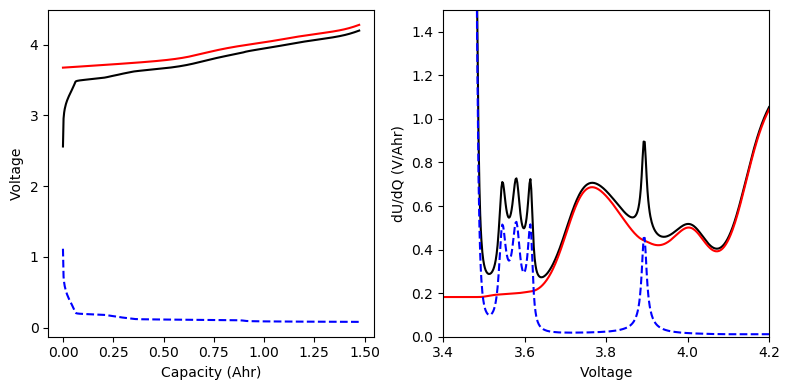

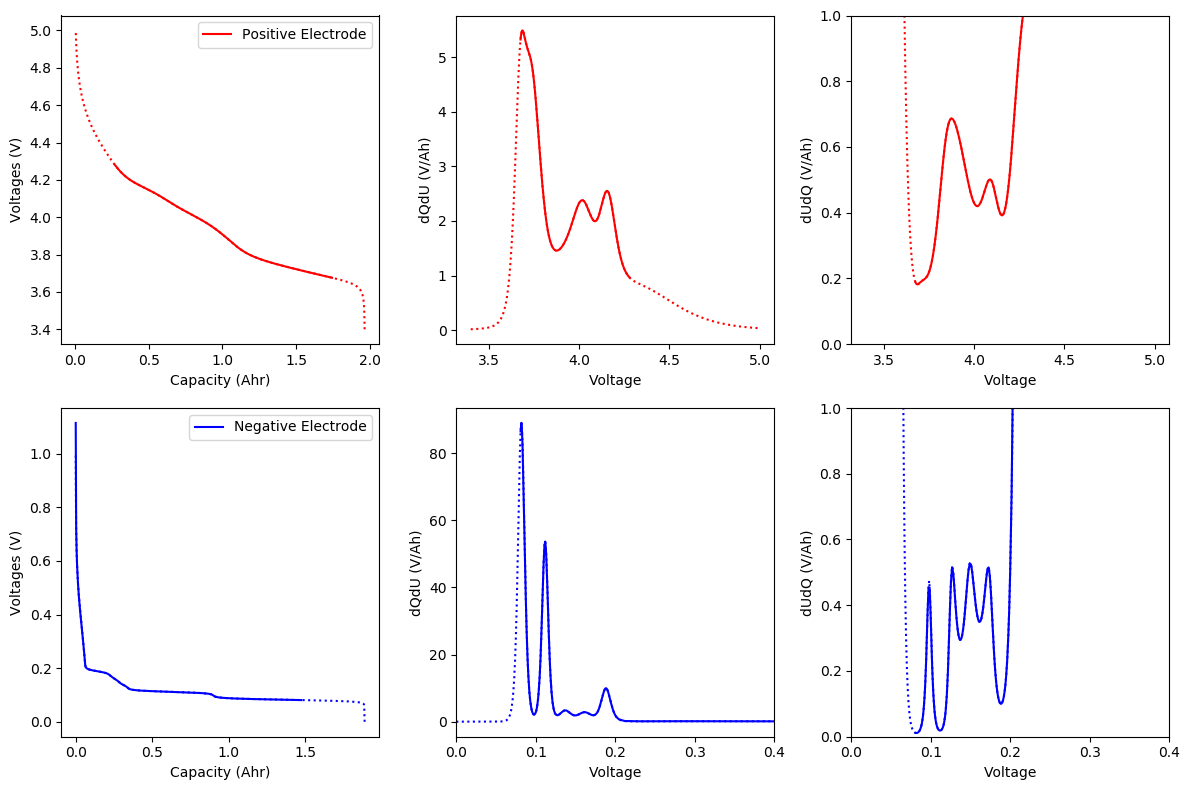

In [21]:
# 0 Cycles
results_51_0c = msmr.whole_cell(guess_full_0_51c, nor_pos = 6, nor_neg = 6,
                                pos_lower_li_limit = 0.27, neg_lower_li_limit=0.0,
                                temp = 298, pos_volt_range = (3.4, 5), 
                                neg_volt_range = (0, 1), p_capacity=None, n_p=None,
                                usable_cap = fresh_capacity_51.max(), Qj_or_Xj='Qj', all_output=True)

pos_whole_0 = msmr.electrode_response(guess_full_0_51c[0:18], 298, 3.4, 5, 6)
neg_whole_0 = msmr.electrode_response(guess_full_0_51c[18:36], 298, 0, 1, 6)

fig_1_0, fig_2_0 = mp.individual_electrode_analysis(results_51_0c, pos_whole_0, neg_whole_0)


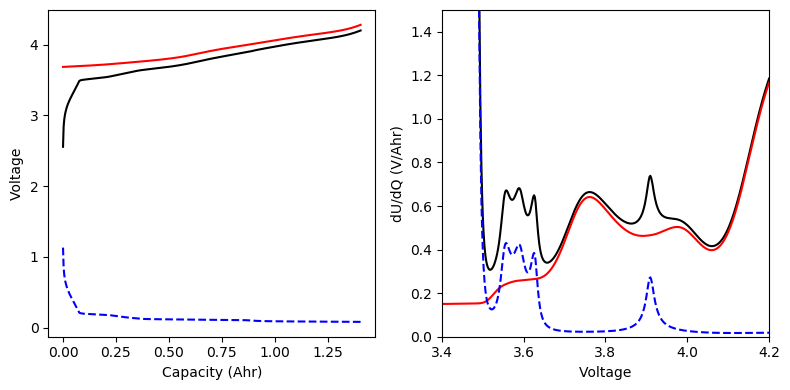

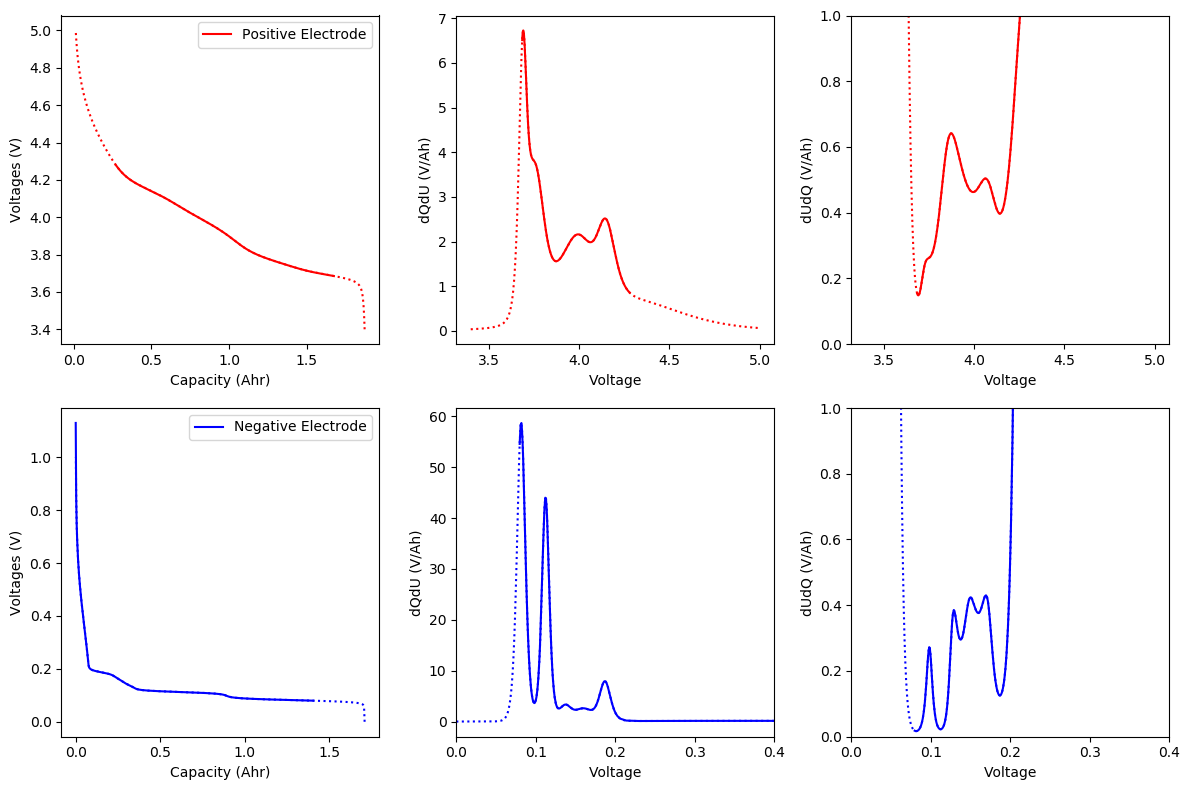

In [22]:
# 300 Cycles
results_300_1c = msmr.whole_cell(guess_full_300_1c, nor_pos = 6, nor_neg = 6, 
                                 pos_lower_li_limit = yvolt300_1c[-2], neg_lower_li_limit = yvolt300_1c[-1],
                                 temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1), 
                                 usable_cap = aged_300_capacity_1.max(), n_p=None, p_capacity=None,
                                 Qj_or_Xj='Qj', all_output=True)

pos_whole_300 = msmr.electrode_response(guess_full_300_1c[0:18], 298, 3.4, 5, 6)
neg_whole_300 = msmr.electrode_response(guess_full_300_1c[18:36], 298, 0, 1, 6)

fig_1_300, fig_2_300 = mp.individual_electrode_analysis(results_300_1c, pos_whole_300, neg_whole_300)

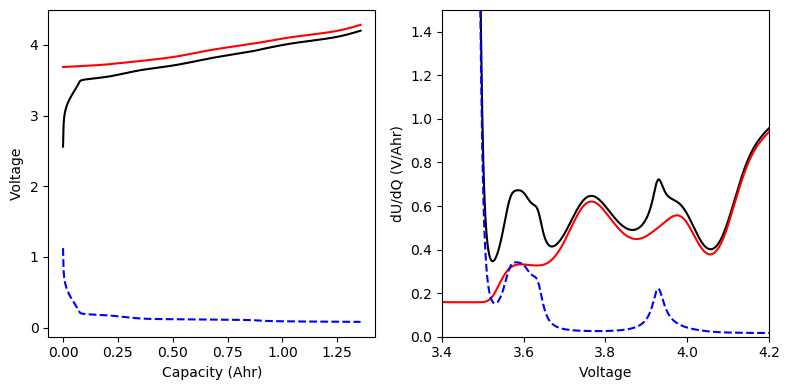

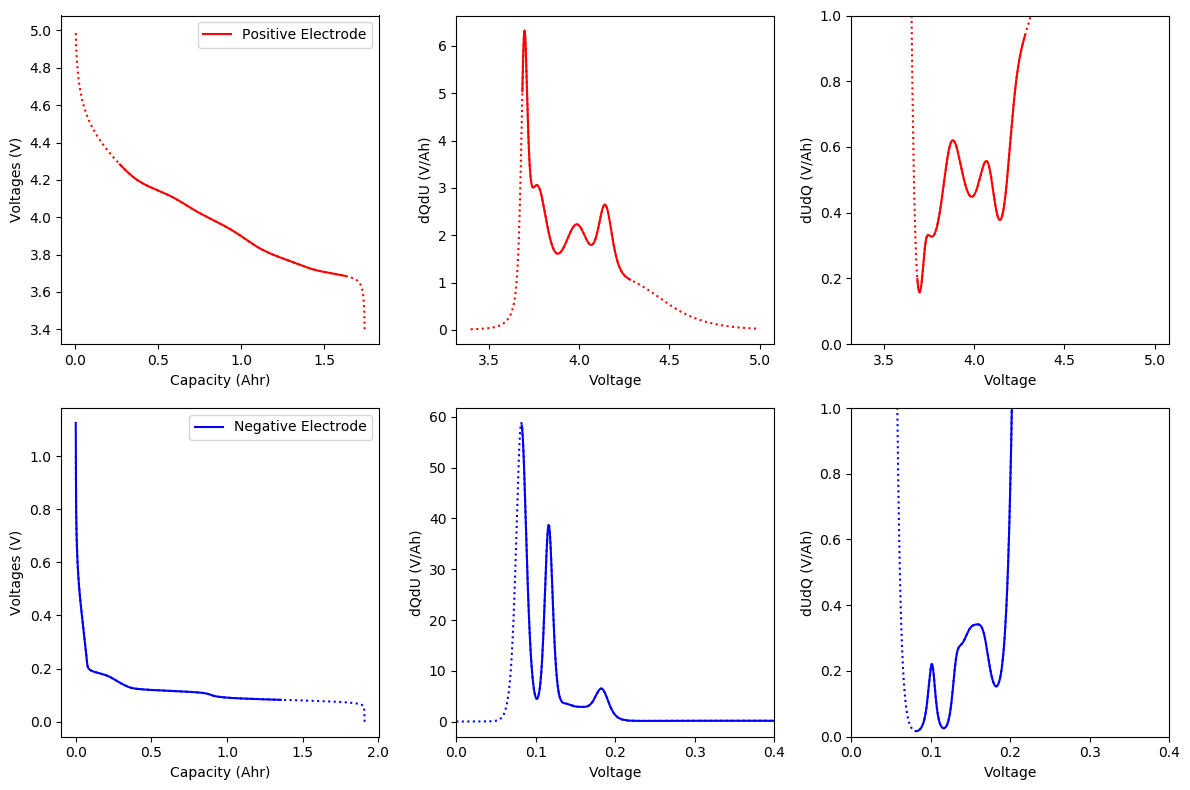

In [23]:
# 600 Cycles
results_600_49c = msmr.whole_cell(guess_full_600_49c, nor_pos = 6, nor_neg = 6, 
                                 pos_lower_li_limit = yvolt600_49c[-2], neg_lower_li_limit = yvolt600_49c[-1],
                                 temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1), 
                                 usable_cap = aged_600_capacity_49.max(), n_p=None, p_capacity=None,
                                 Qj_or_Xj='Qj', all_output=True)

pos_whole_600 = msmr.electrode_response(guess_full_600_49c[0:18], 298, 3.4, 5, 6)
neg_whole_600 = msmr.electrode_response(guess_full_600_49c[18:36], 298, 0, 1, 6)

fig_1_600, fig_2_600 = mp.individual_electrode_analysis(results_600_49c, pos_whole_600, neg_whole_600)

#### Saving the Data and Figures

In [24]:
run = False

if run == True:
    fit_0_data = np.append(yvolt0_51c, (ocv_mae_list_all[0], deriv_mae_list_all[0]))
    fit_300_data = np.append(yvolt300_1c, (ocv_mae_list_all[1], deriv_mae_list_all[1]))
    fit_600_data = np.append(yvolt600_49c, (ocv_mae_list_all[2], deriv_mae_list_all[2]))

    save_data = np.vstack((fit_0_data, fit_300_data, fit_600_data))
    np.savetxt('../supplementary-files/parameter-fits/0-300-600-charge-fit-parameters.txt', save_data)

else:
    pass

<a id='0-Cycle-Replicate-Fitting'></a>

## 0 Cycle Replicate Fitting

<p>&nbsp;</p>

[Back To Top](#top)

In [25]:
# Charged
fresh_ocv_bounds = []
for i in range(0,int(nor_pos+nor_neg)):
    fresh_ocv_bounds.append((fresh_guess[i*3] - 0.02, fresh_guess[i*3] + 0.02))
    fresh_ocv_bounds.append((fresh_guess[i*3 + 1]*0.75, fresh_guess[i*3 + 1]*1.25))
    fresh_ocv_bounds.append((fresh_guess[i*3 + 2]*0.75, fresh_guess[i*3 + 2]*1.25))

fresh_ocv_bounds.append((0.18, 0.27))
fresh_ocv_bounds.append((0, 0.0108))
    
fresh_ocv_bounds[13] = (fresh_guess[13]*0.95, fresh_guess[13]*1.05)
fresh_ocv_bounds[16] = (fresh_guess[16]*0.95, fresh_guess[16]*1.05)

yvolt0_52c = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=fresh_guess, 
                        args=(voltage_range_c,             # interpolated voltage range
                              data_cap_interp_52,       # interpolated capacity data
                              data_dvdq_interp_52,     # interpolated dvdq data
                              fresh_voltage_52.min(),   # Minimum voltage
                              fresh_voltage_52.max(),   # Maximum voltage
                              298,                       # temperature
                              6, 6,                      # number of pos rxns, number of neg rxns
                              (3.4,5), (0,1),            # positive voltage range, negative voltange range
                              0.27, 0.0,                  # positive | neg lower X or Q limit
                              None,                      # N|P Ratio
                              None,                      # positive electrode full capacity
                              fresh_capacity_52.max(),  # usable/cyclable capacity within the voltage limits
                              'Qj', 'MAE',                     # Qj or Xj
                              None,                      # list of pos_U0s
                              None,                      # list of neg_U0s
                              False,                     # fixed voltage
                              True,                      # fixed xj_limit
                              0.0, 1.0),                 # capacity vs dvdq weight on error function
                        eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                        bounds=fresh_ocv_bounds, iter=500, full_output=False)
print('Fit for Cell 52 done')

yvolt0_53c = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=fresh_guess, 
                        args=(voltage_range_c,             # interpolated voltage range
                              data_cap_interp_53,       # interpolated capacity data
                              data_dvdq_interp_53,     # interpolated dvdq data
                              fresh_voltage_53.min(),   # Minimum voltage
                              fresh_voltage_53.max(),   # Maximum voltage
                              298,                       # temperature
                              6, 6,                      # number of pos rxns, number of neg rxns
                              (3.4,5), (0,1),            # positive voltage range, negative voltange range
                              0.27, 0.0,                  # positive | neg lower X or Q limit
                              None,                      # N|P Ratio
                              None,                      # positive electrode full capacity
                              fresh_capacity_53.max(),  # usable/cyclable capacity within the voltage limits
                              'Qj', 'MAE',                      # Qj or Xj
                              None,                      # list of pos_U0s
                              None,                      # list of neg_U0s
                              False,                     # fixed voltage
                              True,                      # fixed xj_limit
                              0.0, 1.0),                 # capacity vs dvdq weight on error function
                        eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                        bounds=fresh_ocv_bounds, iter=500, full_output=False)
print('Fit for Cell 53 Done')

yvolt0_54c = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=fresh_guess, 
                        args=(voltage_range_c,             # interpolated voltage range
                              data_cap_interp_54,       # interpolated capacity data
                              data_dvdq_interp_54,     # interpolated dvdq data
                              fresh_voltage_54.min(),   # Minimum voltage
                              fresh_voltage_54.max(),   # Maximum voltage
                              298,                       # temperature
                              6, 6,                      # number of pos rxns, number of neg rxns
                              (3.4,5), (0,1),            # positive voltage range, negative voltange range
                              0.27, 0.0,                 # positive | neg lower X or Q limit
                              None,                      # N|P Ratio
                              None,                      # positive electrode full capacity
                              fresh_capacity_54.max(),  # usable/cyclable capacity within the voltage limits
                              'Qj', 'MAE',                      # Qj or Xj
                              None,                      # list of pos_U0s
                              None,                      # list of neg_U0s
                              False,                     # fixed voltage
                              True,                      # fixed xj_limit
                              0.0, 1.0),                 # capacity vs dvdq weight on error function
                        eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                        bounds=fresh_ocv_bounds, iter=500, full_output=False)

print('Fit for Cell 54 complete')

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.054598600985615135
            Iterations: 67
            Function evaluations: 2730
            Gradient evaluations: 67
Fit for Cell 52 done
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.05628491562555408
            Iterations: 88
            Function evaluations: 3580
            Gradient evaluations: 88
Fit for Cell 53 Done
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.05478170879715976
            Iterations: 76
            Function evaluations: 3087
            Gradient evaluations: 76
Fit for Cell 54 complete


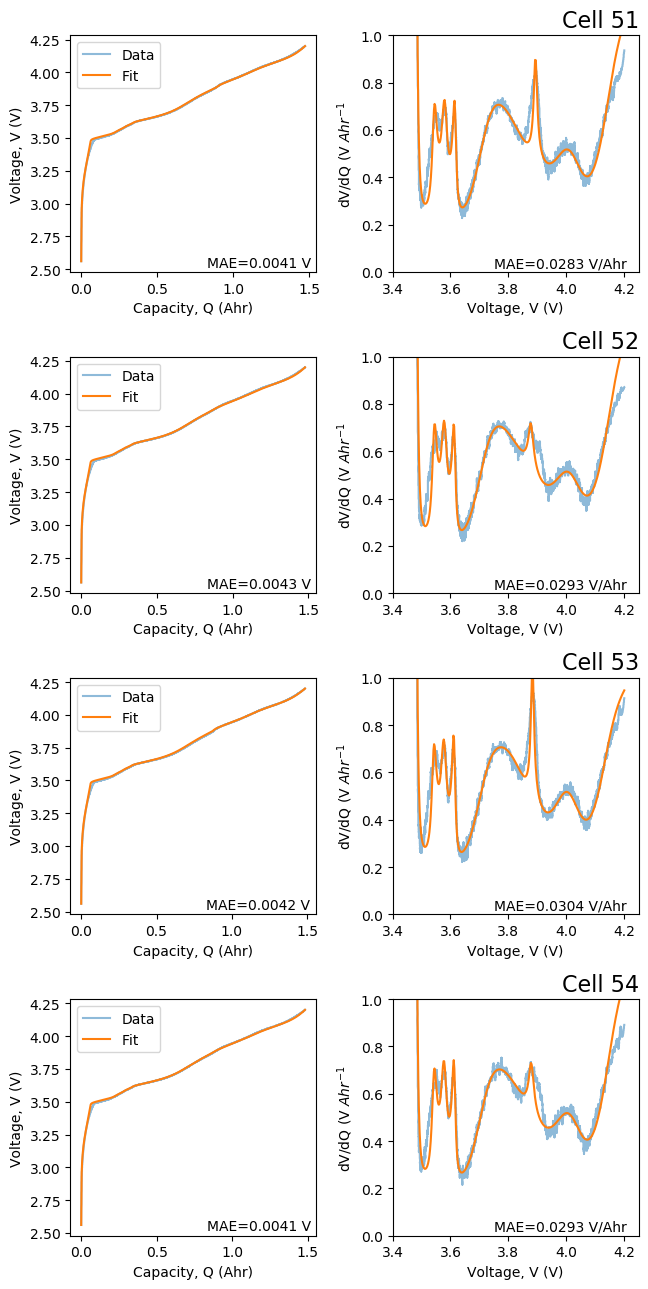

In [26]:
# MSMR results for all the fits for replicates
guess_full_0_52c = yvolt0_52c[0:(3*(nor_pos+nor_neg))]
cap0_52c, v0_52c, dqdu0_52c, dvdq0_52c = msmr.whole_cell(guess_full_0_52c, nor_pos = 6, nor_neg = 6, 
                                                         pos_lower_li_limit = 0.27, neg_lower_li_limit=0.0,
                                                         temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1),
                                                         n_p = None, p_capacity = None, Qj_or_Xj='Qj',
                                                         usable_cap = fresh_capacity_52.max())

guess_full_0_53c = yvolt0_53c[0:(3*(nor_pos+nor_neg))]
cap0_53c, v0_53c, dqdu0_53c, dvdq0_53c = msmr.whole_cell(guess_full_0_53c, nor_pos = 6, nor_neg = 6, 
                                                         pos_lower_li_limit = 0.27, neg_lower_li_limit=0.0,
                                                         temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1),
                                                         n_p = None, p_capacity = None, Qj_or_Xj='Qj',
                                                         usable_cap = fresh_capacity_53.max())

guess_full_0_54c = yvolt0_54c[0:(3*(nor_pos+nor_neg))]
cap0_54c, v0_54c, dqdu0_54c, dvdq0_54c = msmr.whole_cell(guess_full_0_54c, nor_pos = 6, nor_neg = 6, 
                                                         pos_lower_li_limit = 0.27, neg_lower_li_limit=0.0,
                                                         temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1),
                                                         n_p = None, p_capacity = None, Qj_or_Xj='Qj',
                                                         usable_cap = fresh_capacity_54.max())

# Calculating MAEs
capacity_range0_52 = np.linspace(0.0, fresh_capacity_52.max(), 251)
capacity_range0_53 = np.linspace(0.0, fresh_capacity_53.max(), 251)
capacity_range0_54 = np.linspace(0.0, fresh_capacity_54.max(), 251)

fit0_52_mae_c = msmr.mae(fresh_voltage_52, v0_52c, cap0_52c, fresh_capacity_52, capacity_range0_52)
fit0_53_mae_c = msmr.mae(fresh_voltage_53, v0_53c, cap0_53c, fresh_capacity_53, capacity_range0_53)
fit0_54_mae_c = msmr.mae(fresh_voltage_54, v0_54c, cap0_54c, fresh_capacity_54, capacity_range0_54)

ocv_mae_list = [fit0_51_mae_c, fit0_52_mae_c, fit0_53_mae_c, fit0_54_mae_c]

deriv_list = [(v0_51c, dvdq0_51c, fresh_voltage_51, fresh_dvdq_51),
              (v0_52c, dvdq0_52c, fresh_voltage_52, fresh_dvdq_52),
              (v0_53c, dvdq0_53c, fresh_voltage_53, fresh_dvdq_53),
              (v0_54c, dvdq0_54c, fresh_voltage_54, fresh_dvdq_54)]
deriv_mae_list = [msmr.mae(item[3], -(item[1]), item[0], item[2], voltage_range_c) for item in deriv_list]

# Plotting
fig = plt.figure(figsize=(6.5, 13))
ax, ax2 = fig.add_subplot(421), fig.add_subplot(422) # First Row
ax3, ax4 = fig.add_subplot(423), fig.add_subplot(424) # Second Row
ax5, ax6 = fig.add_subplot(425), fig.add_subplot(426) # Third Row
ax7, ax8 = fig.add_subplot(427), fig.add_subplot(428) # Fourth Row

axes = [ax, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
axes_left, axes_right = [ax, ax3, ax5, ax7], [ax2, ax4, ax6, ax8]
cells = ['Cell 51', 'Cell 52', 'Cell 53', 'Cell 54']

# Capacity vs OCV 
ax.plot(fresh_capacity_51, fresh_voltage_51, alpha=0.5, label='Data')
ax.plot(cap0_51c, v0_51c, label='Fit')

ax3.plot(fresh_capacity_52, fresh_voltage_52, alpha=0.5, label='Data')
ax3.plot(cap0_52c, v0_52c, label='Fit')

ax5.plot(fresh_capacity_53, fresh_voltage_53, alpha=0.5, label='Data')
ax5.plot(cap0_53c, v0_53c, label='Fit')

ax7.plot(fresh_capacity_54, fresh_voltage_54, alpha=0.5, label='Data')
ax7.plot(cap0_54c, v0_54c, label='Fit')

# OCV vs dV/dQ
ax2.plot(fresh_voltage_51, fresh_dvdq_51, alpha=0.5, label='Data')
ax2.plot(v0_51c, -dvdq0_51c, label='Fit')

ax4.plot(fresh_voltage_52, fresh_dvdq_52, alpha=0.5, label='Data')
ax4.plot(v0_52c, -dvdq0_52c, label='Fit')

ax6.plot(fresh_voltage_53, fresh_dvdq_53, alpha=0.5, label='Data')
ax6.plot(v0_53c, -dvdq0_53c, label='Fit')

ax8.plot(fresh_voltage_54, fresh_dvdq_54, alpha=0.5, label='Data')
ax8.plot(v0_54c, -dvdq0_54c, label='Fit')

for idx, axe in enumerate(axes_left):
    axe.set_xlabel('Capacity, Q (Ahr)')
    axe.set_ylabel('Voltage, V (V)')
    axe.text(.83, 2.52, 'MAE=%1.4f V' %ocv_mae_list[idx])
    axe.legend()
    
for idx, axe in enumerate(axes_right):
    axe.set_xlabel('Voltage, V (V)')
    axe.set_ylabel('dV/dQ (V $Ahr^{-1}$')
    axe.set_xlim(3.4, 4.25)
    axe.set_ylim(0, 1)
    axe.text(3.75, 0.02, 'MAE=%1.4f V/Ahr' %deriv_mae_list[idx])
    axe.set_title(cells[idx], loc='right', fontsize = 16)
    
fig.tight_layout()
fig.savefig('../figures/Figures SI/0_fit_replicates.png', dpi = 300)

In [27]:
fit_0_replicates = np.vstack((yvolt0_51c, yvolt0_52c, yvolt0_53c, yvolt0_54c))
fit_0_replicate_means = np.round(fit_0_replicates.mean(axis=0),4)
fit_0_replicate_stds = np.round(fit_0_replicates.std(axis=0),4)
print('Parameter Mean and Standard Deviations Amongst the 4 Replicates')
for i in range(0,nor_pos+nor_neg):
    print('{} +/- {} | '.format(fit_0_replicate_means[i*3], fit_0_replicate_stds[i*3]), 
          '{} +/- {} | '.format(fit_0_replicate_means[i*3+1], fit_0_replicate_stds[i*3+1]),
          '{} +/- {}'.format(fit_0_replicate_means[i*3+2], fit_0_replicate_stds[i*3+2]))


Parameter Mean and Standard Deviations Amongst the 4 Replicates
3.6741 +/- 0.0014 |  0.231 +/- 0.0 |  0.7253 +/- 0.0
3.7346 +/- 0.0013 |  0.5579 +/- 0.0 |  1.2989 +/- 0.0116
3.8985 +/- 0.0075 |  0.2458 +/- 0.009 |  2.6288 +/- 0.0
4.2804 +/- 0.0002 |  0.5352 +/- 0.0029 |  5.9916 +/- 0.4183
4.0215 +/- 0.0036 |  0.2223 +/- 0.0 |  1.5099 +/- 0.0869
4.1589 +/- 0.0045 |  0.1814 +/- 0.0 |  1.1328 +/- 0.0169
0.0836 +/- 0.003 |  0.9605 +/- 0.097 |  0.1076 +/- 0.0
0.1119 +/- 0.0005 |  0.539 +/- 0.008 |  0.1001 +/- 0.0
0.1371 +/- 0.0002 |  0.0595 +/- 0.001 |  0.1875 +/- 0.0
0.1617 +/- 0.0001 |  0.058 +/- 0.0009 |  0.2187 +/- 0.0
0.1885 +/- 0.0 |  0.1524 +/- 0.0016 |  0.1525 +/- 0.0
0.3432 +/- 0.0 |  0.0813 +/- 0.0 |  4.4802 +/- 0.0


<a id='300-Cycles-Replicate-Fitting'></a>

## 300 Cycles Replicate Fitting

<p>&nbsp;</p>

[Back To Top](#top)

In [28]:
# Charge # 300 Cycles

aged_300_ocv_bounds = []
for i in range(0,int(nor_pos+nor_neg)):
    aged_300_ocv_bounds.append((yvolt0_51c[i*3] - 0.02, yvolt0_51c[i*3] + 0.02))
    aged_300_ocv_bounds.append((yvolt0_51c[i*3 + 1]*0.75, yvolt0_51c[i*3 + 1]*1.25))
    aged_300_ocv_bounds.append((yvolt0_51c[i*3 + 2]*0.75, yvolt0_51c[i*3 + 2]*1.25))
    
aged_300_ocv_bounds.append((0.2106, 0.27))
aged_300_ocv_bounds.append((0, 0.0108))
    
yvolt300_2c = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=yvolt0_51c, 
                         args=(voltage_range_c,        # interpolated voltage range
                               a300_data_cap_interp_2,      # interpolated capacity data
                               a300_data_dvdq_interp_2,     # interpolated dvdq data
                               aged_300_voltage_2.min(),  # Minimum voltage
                               aged_300_voltage_2.max(),  # Maximum voltage
                               298,                  # temperature
                               6, 6,                 # number of pos rxns, number of neg rxns
                               (3.4,5), (0,1),       # positive voltage range, negative voltange range
                               None,                 # positive lower X limit
                               None,                 # negative lower X limit
                               None,                 # N|P Ratio
                               None,                 # positive electrode full capacity
                               aged_300_capacity_2.max(), # usable/cyclable capacity within the voltage limits
                               'Qj', 'MAE',                 # Qj or Xj
                               None,                 # list of pos_U0s
                               None,                 # list of neg_U0s
                               False,                # fixed voltage
                               False,                 # fixed xj_limit
                               0.0,                  # capacity weight on error function
                               1.0),                 # dvdq weight on error function
                         eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                         bounds=aged_300_ocv_bounds, iter=500, full_output=False)

print(yvolt300_2c)

yvolt300_3c = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=yvolt0_51c, 
                         args=(voltage_range_c,        # interpolated voltage range
                               a300_data_cap_interp_3,      # interpolated capacity data
                               a300_data_dvdq_interp_3,     # interpolated dvdq data
                               aged_300_voltage_3.min(),  # Minimum voltage
                               aged_300_voltage_3.max(),  # Maximum voltage
                               298,                  # temperature
                               6, 6,                 # number of pos rxns, number of neg rxns
                               (3.4,5), (0,1),       # positive voltage range, negative voltange range
                               None,                 # positive lower X limit
                               None,                 # negative lower X limit
                               None,                 # N|P Ratio
                               None,                 # positive electrode full capacity
                               aged_300_capacity_3.max(), # usable/cyclable capacity within the voltage limits
                               'Qj', 'MAE',                 # Qj or Xj
                               None,                 # list of pos_U0s
                               None,                 # list of neg_U0s
                               False,                # fixed voltage
                               False,                 # fixed xj_limit
                               0.0,                  # capacity weight on error function
                               1.0),                 # dvdq weight on error function
                         eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                         bounds=aged_300_ocv_bounds, iter=500, full_output=False)

print(yvolt300_3c)

yvolt300_4c = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=yvolt0_51c, 
                         args=(voltage_range_c,        # interpolated voltage range
                               a300_data_cap_interp_4,      # interpolated capacity data
                               a300_data_dvdq_interp_4,     # interpolated dvdq data
                               aged_300_voltage_4.min(),  # Minimum voltage
                               aged_300_voltage_4.max(),  # Maximum voltage
                               298,                  # temperature
                               6, 6,                 # number of pos rxns, number of neg rxns
                               (3.4,5), (0,1),       # positive voltage range, negative voltange range
                               None,                 # positive lower X limit
                               None,                 # negative lower X limit
                               None,                 # N|P Ratio
                               None,                 # positive electrode full capacity
                               aged_300_capacity_4.max(), # usable/cyclable capacity within the voltage limits
                               'Qj', 'MAE',                 # Qj or Xj
                               None,                 # list of pos_U0s
                               None,                 # list of neg_U0s
                               False,                # fixed voltage
                               False,                 # fixed xj_limit
                               0.0,                  # capacity weight on error function
                               1.0),                 # dvdq weight on error function
                         eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                         bounds=aged_300_ocv_bounds, iter=500, full_output=False)

print(yvolt300_4c)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.04325183000046566
            Iterations: 81
            Function evaluations: 3311
            Gradient evaluations: 81
[3.68376698e+00 2.50804666e-01 5.43993750e-01 3.74971717e+00
 4.18429682e-01 1.27174137e+00 3.92484598e+00 2.27857711e-01
 2.74893637e+00 4.26009350e+00 5.43261092e-01 7.56806432e+00
 4.00046733e+00 2.10386006e-01 1.92431615e+00 4.14298597e+00
 1.89042501e-01 1.21515340e+00 7.25956064e-02 8.04859763e-01
 1.34546875e-01 1.04968963e-01 5.38476177e-01 1.25140625e-01
 1.30178854e-01 5.62038905e-02 1.84985286e-01 1.53065779e-01
 6.65247455e-02 2.73437500e-01 1.80005623e-01 1.39767041e-01
 1.69246558e-01 3.38057995e-01 1.01648250e-01 5.50341815e+00
 2.70000000e-01 1.38075580e-04]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.05685169672231406
            Iterations: 76
            Function evaluations: 3108
            Gradient evaluat

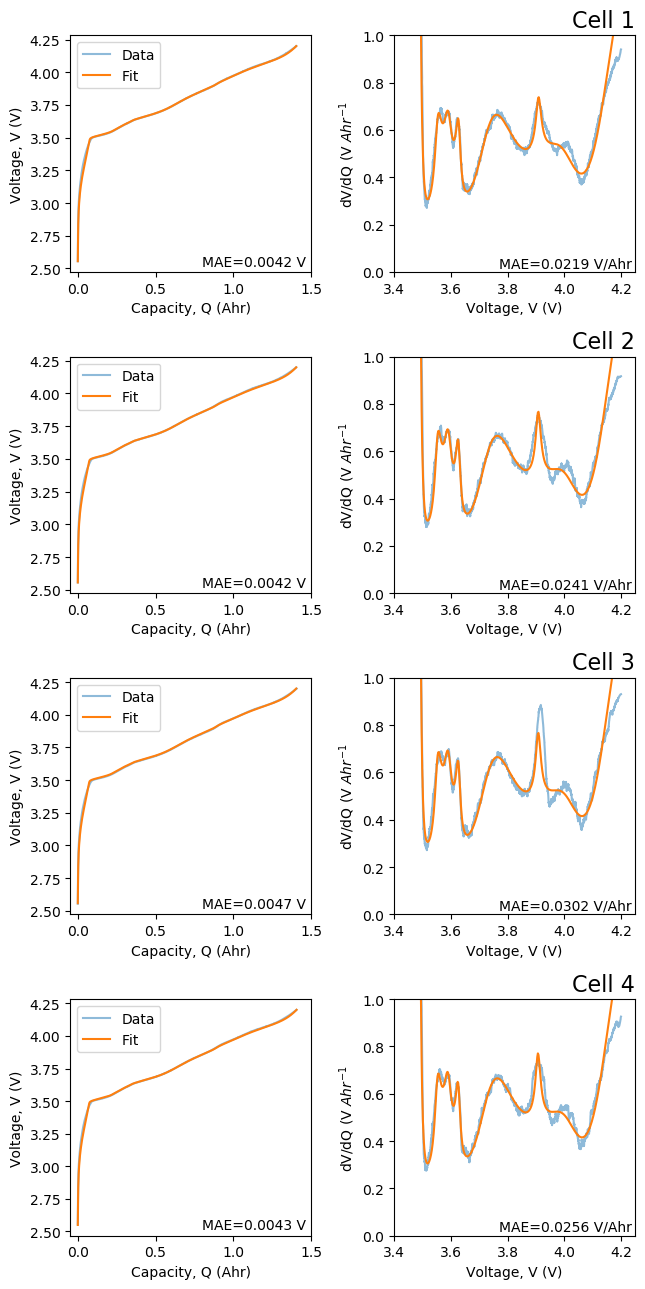

In [29]:
guess_full_300_2c = yvolt300_2c[0:(3*(nor_pos+nor_neg))]
cap300_2c, v300_2c, dqdu300_2c, dvdq300_2c = msmr.whole_cell(guess_full_300_2c, nor_pos = 6, nor_neg = 6, 
                                                                 pos_lower_li_limit = yvolt300_2c[-2], neg_lower_li_limit = yvolt300_2c[-1],
                                                                 temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1), 
                                                                 n_p = None, p_capacity = None, Qj_or_Xj = 'Qj',
                                                                 usable_cap = aged_300_capacity_2.max())
guess_full_300_3c = yvolt300_3c[0:(3*(nor_pos+nor_neg))]
cap300_3c, v300_3c, dqdu300_3c, dvdq300_3c = msmr.whole_cell(guess_full_300_2c, nor_pos = 6, nor_neg = 6, 
                                                                 pos_lower_li_limit = yvolt300_3c[-2], neg_lower_li_limit = yvolt300_3c[-1],
                                                                 temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1), 
                                                                 n_p = None, p_capacity = None, Qj_or_Xj = 'Qj',
                                                                 usable_cap = aged_300_capacity_2.max())


guess_full_300_4c = yvolt300_4c[0:(3*(nor_pos+nor_neg))]
cap300_4c, v300_4c, dqdu300_4c, dvdq300_4c = msmr.whole_cell(guess_full_300_2c, nor_pos = 6, nor_neg = 6, 
                                                                 pos_lower_li_limit = yvolt300_4c[-2], neg_lower_li_limit = yvolt300_4c[-1],
                                                                 temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1), 
                                                                 n_p = None, p_capacity = None, Qj_or_Xj = 'Qj',
                                                                 usable_cap = aged_300_capacity_4.max())


# MAEs
capacity_range300_2 = np.linspace(0.0, aged_300_capacity_2.max(), 251)
capacity_range300_3 = np.linspace(0.0, aged_300_capacity_3.max(), 251)
capacity_range300_4 = np.linspace(0.0, aged_300_capacity_4.max(), 251)

fit300_2_mae_c = msmr.mae(aged_300_voltage_2, v300_2c, cap300_2c, aged_300_capacity_2, capacity_range300_2)
fit300_3_mae_c = msmr.mae(aged_300_voltage_3, v300_3c, cap300_3c, aged_300_capacity_3, capacity_range300_3)
fit300_4_mae_c = msmr.mae(aged_300_voltage_4, v300_4c, cap300_4c, aged_300_capacity_4, capacity_range300_4)

ocv_mae_list_300 = [fit300_1_mae_c, fit300_2_mae_c, fit300_3_mae_c, fit300_4_mae_c]
deriv_list = [(v300_1c, dvdq300_1c, aged_300_voltage_1, aged_300_dvdq_1),
              (v300_2c, dvdq300_2c, aged_300_voltage_2, aged_300_dvdq_2),
              (v300_3c, dvdq300_3c, aged_300_voltage_3, aged_300_dvdq_3),
              (v300_4c, dvdq300_4c, aged_300_voltage_4, aged_300_dvdq_4)]

deriv_mae_list_300 = [msmr.mae(item[3], -(item[1]), item[0], item[2], voltage_range_c) for item in deriv_list]

# Plotting
fig = plt.figure(figsize=(6.5, 13))
ax, ax2 = fig.add_subplot(421), fig.add_subplot(422) # First Row
ax3, ax4 = fig.add_subplot(423), fig.add_subplot(424) # Second Row
ax5, ax6 = fig.add_subplot(425), fig.add_subplot(426) # Third Row
ax7, ax8 = fig.add_subplot(427), fig.add_subplot(428) # Fourth Row

axes = [ax, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
axes_left, axes_right = [ax, ax3, ax5, ax7], [ax2, ax4, ax6, ax8]
cells = ['Cell 1', 'Cell 2', 'Cell 3', 'Cell 4']

# Capacity vs OCV 
ax.plot(aged_300_capacity_1, aged_300_voltage_1, alpha=0.5, label='Data')
ax.plot(cap300_1c, v300_1c, label='Fit')

ax3.plot(aged_300_capacity_2, aged_300_voltage_2, alpha=0.5, label='Data')
ax3.plot(cap300_2c, v300_2c, label='Fit')

ax5.plot(aged_300_capacity_3, aged_300_voltage_3, alpha=0.5, label='Data')
ax5.plot(cap300_3c, v300_3c, label='Fit')

ax7.plot(aged_300_capacity_4, aged_300_voltage_4, alpha=0.5, label='Data')
ax7.plot(cap300_4c, v300_4c, label='Fit')

# OCV vs dV/dQ
ax2.plot(aged_300_voltage_1, aged_300_dvdq_1, alpha=0.5, label='Data')
ax2.plot(v300_1c, -dvdq300_1c, label='Fit')

ax4.plot(aged_300_voltage_2, aged_300_dvdq_2, alpha=0.5, label='Data')
ax4.plot(v300_2c, -dvdq300_2c, label='Fit')

ax6.plot(aged_300_voltage_3, aged_300_dvdq_3, alpha=0.5, label='Data')
ax6.plot(v300_3c, -dvdq300_3c, label='Fit')

ax8.plot(aged_300_voltage_4, aged_300_dvdq_4, alpha=0.5, label='Data')
ax8.plot(v300_4c, -dvdq300_4c, label='Fit')

for idx, axe in enumerate(axes_left):
    axe.set_xlabel('Capacity, Q (Ahr)')
    axe.set_ylabel('Voltage, V (V)')
    axe.text(.8, 2.52, 'MAE=%1.4f V' %ocv_mae_list_300[idx])
    axe.set_xlim(-0.05, 1.5)
    axe.legend()
    
for idx, axe in enumerate(axes_right):
    axe.set_xlabel('Voltage, V (V)')
    axe.set_ylabel('dV/dQ (V $Ahr^{-1}$')
    axe.set_xlim(3.4, 4.25)
    axe.set_ylim(0, 1)
    axe.text(3.77, 0.02, 'MAE=%1.4f V/Ahr' %deriv_mae_list_300[idx])
    axe.set_title(cells[idx], loc='right', fontsize = 16)
    
fig.tight_layout()
fig.savefig('../figures/Figures SI/fit_300_replicates.png', dpi=300)

In [30]:
fit_300_replicates = np.vstack((yvolt300_1c, yvolt300_2c, yvolt300_3c, yvolt300_4c))
fit_300_replicate_means = np.round(fit_300_replicates.mean(axis=0),4)
fit_300_replicate_stds = np.round(fit_300_replicates.std(axis=0),4)
print('Parameter Mean and Standard Deviations Amongst the 4 Replicates')
for i in range(0,nor_pos+nor_neg):
    print('{} +/- {} | '.format(fit_300_replicate_means[i*3], fit_300_replicate_stds[i*3]), 
          '{} +/- {} | '.format(fit_300_replicate_means[i*3+1], fit_300_replicate_stds[i*3+1]),
          '{} +/- {}'.format(fit_300_replicate_means[i*3+2], fit_300_replicate_stds[i*3+2]))


Parameter Mean and Standard Deviations Amongst the 4 Replicates
3.6804 +/- 0.006 |  0.2793 +/- 0.0164 |  0.544 +/- 0.0
3.7502 +/- 0.0049 |  0.4185 +/- 0.0001 |  1.3064 +/- 0.0843
3.9248 +/- 0.0 |  0.2206 +/- 0.0373 |  2.8038 +/- 0.1528
4.2601 +/- 0.0 |  0.5461 +/- 0.0083 |  7.5284 +/- 0.0621
4.0006 +/- 0.0002 |  0.2151 +/- 0.024 |  1.9243 +/- 0.0
4.1455 +/- 0.0034 |  0.1881 +/- 0.012 |  1.2208 +/- 0.0422
0.0746 +/- 0.0053 |  0.8117 +/- 0.0044 |  0.1345 +/- 0.0
0.1075 +/- 0.0055 |  0.5568 +/- 0.0354 |  0.1235 +/- 0.0029
0.1325 +/- 0.0049 |  0.0578 +/- 0.0023 |  0.2088 +/- 0.0186
0.1546 +/- 0.0041 |  0.0598 +/- 0.0083 |  0.2684 +/- 0.0088
0.1789 +/- 0.0056 |  0.1348 +/- 0.0114 |  0.169 +/- 0.0094
0.3362 +/- 0.0151 |  0.0986 +/- 0.0043 |  5.4539 +/- 0.0709


<a id='600-Cycles-Replicate-Fitting'></a>

## 600 Cycles Replicate Fitting

<p>&nbsp;</p>

[Back To Top](#top)

In [31]:
# 600 Cycles
aged_600_ocv_bounds = []
for i in range(0,int(nor_pos+nor_neg)):
    aged_600_ocv_bounds.append((yvolt300_1c[i*3] - 0.01, yvolt300_1c[i*3] + 0.01))
    aged_600_ocv_bounds.append((yvolt300_1c[i*3 + 1]*0.75, yvolt300_1c[i*3 + 1]*1.25))
    aged_600_ocv_bounds.append((yvolt300_1c[i*3 + 2]*0.75, yvolt300_1c[i*3 + 2]*1.25))
    
# for i in range(0,int(nor_pos)):
#     aged_600_ocv_bounds.append((yvolt300_1c[i*3] - 0.015, yvolt300_1c[i*3] + 0.015))
#     aged_600_ocv_bounds.append((yvolt300_1c[i*3 + 1]*0.75, yvolt300_1c[i*3 + 1]*1.25))
#     aged_600_ocv_bounds.append((yvolt300_1c[i*3 + 2]*0.75, yvolt300_1c[i*3 + 2]*1.25))
# for i in range(int(nor_pos),int(nor_pos+nor_neg)):
#     aged_600_ocv_bounds.append((yvolt300_1c[i*3] - 0.01, yvolt300_1c[i*3] + 0.01))
#     aged_600_ocv_bounds.append((yvolt300_1c[i*3 + 1]*0.9, yvolt300_1c[i*3 + 1]*1.1))
#     aged_600_ocv_bounds.append((yvolt300_1c[i*3 + 2]*0.9, yvolt300_1c[i*3 + 2]*1.1))

aged_600_ocv_bounds.append((0.095, yvolt300_1c[-2]))
aged_600_ocv_bounds.append((0, yvolt300_1c[-1]))

yvolt600_50c = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=yvolt300_1c, 
                          args=(voltage_range_c,        # interpolated voltage range
                                a600_data_cap_interp_50,      # interpolated capacity data
                                a600_data_dvdq_interp_50,     # interpolated dvdq data
                                aged_600_voltage_50.min(),  # Minimum voltage
                                aged_600_voltage_50.max(),  # Maximum voltage
                                298,                  # temperature
                                6, 6,                 # number of pos rxns, number of neg rxns
                                (3.4,5), (0,1),       # positive voltage range, negative voltange range
                                None,                 # positive lower X limit
                                None,                 # negative lower X limit
                                None,                 # N|P Ratio
                                None,                 # positive electrode full capacity
                                aged_600_capacity_50.max(), # usable/cyclable capacity within the voltage limits
                               'Qj', 'MAE',          # Qj or Xj
                                None,                 # list of pos_U0s
                                None,                 # list of neg_U0s
                                False,                # fixed voltage
                                False,                 # fixed xj_limit
                                0.0,                  # capacity weight on error function
                                1.0),                 # dvdq weight on error function
                          eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                          bounds=aged_600_ocv_bounds, iter=500, full_output=False)

print(yvolt600_50c)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.026114795735311315
            Iterations: 93
            Function evaluations: 3772
            Gradient evaluations: 93
[3.69493875e+00 2.16594717e-01 4.28365859e-01 3.76562938e+00
 4.07989061e-01 1.46609197e+00 3.93484598e+00 1.64215242e-01
 2.29855906e+00 4.25009350e+00 5.93957220e-01 5.70684391e+00
 3.99046733e+00 1.93357460e-01 1.69726695e+00 4.14117129e+00
 1.60775793e-01 1.01809796e+00 7.77476789e-02 1.01426764e+00
 1.68183594e-01 1.13517113e-01 5.35786488e-01 1.48157591e-01
 1.37556678e-01 6.19374636e-02 2.48916302e-01 1.58470903e-01
 7.28528687e-02 3.41796875e-01 1.80531633e-01 1.26891969e-01
 2.24846244e-01 3.50086388e-01 1.03198230e-01 4.68383926e+00
 2.70000000e-01 3.88201283e-08]


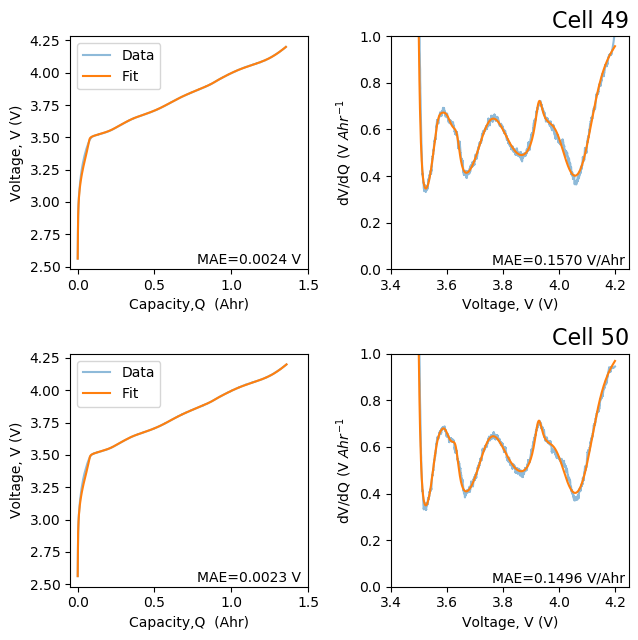

In [32]:
guess_full_600_50c = yvolt600_50c[0:(3*(nor_pos+nor_neg))]

cap600_50c, v600_50c, dqdu600_50c, dvdq600_50c = msmr.whole_cell(guess_full_600_50c, nor_pos = 6, nor_neg = 6, 
                                                                 pos_lower_li_limit = yvolt600_50c[-2], neg_lower_li_limit = yvolt600_50c[-1],
                                                                 temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1), 
                                                                 n_p = None, p_capacity = None, Qj_or_Xj='Qj',
                                                                 usable_cap = aged_600_capacity_50.max())
# MAEs

capacity_range600_50 = np.linspace(0.0, aged_600_capacity_50d.max(), 251)
fit600_50_mae_c = msmr.mae(aged_600_voltage_50, v600_50c, cap600_50c, aged_600_capacity_50, capacity_range600_50)
ocv_mae_list_600 = [fit600_49_mae_c, fit600_50_mae_c]

deriv_list = [(v600_49c, dvdq600_49c, aged_600_voltage_49, aged_600_dvdq_49),
              (v600_50c, dvdq600_50c, aged_600_voltage_50, aged_600_dvdq_50)]

deriv_mae_list_600 = [msmr.mae(item[3], (-item[1]), item[0], item[2], voltage_range_d) for item in deriv_list]

# Plotting
fig = plt.figure(figsize=(6.5, 6.5))
ax, ax2, ax3, ax4 = fig.add_subplot(221), fig.add_subplot(222), fig.add_subplot(223), fig.add_subplot(224)

axes, axes_left, axes_right = [ax, ax2, ax3, ax4], [ax, ax3], [ax2, ax4]
letters = ['(a)', '(b)', '(c)', '(d)']
cells = ['Cell 49', 'Cell 50']

# Capacity vs OCV 
ax.plot(aged_600_capacity_49, aged_600_voltage_49, alpha=0.5, label='Data')
ax.plot(cap600_49c, v600_49c, label='Fit')

ax3.plot(aged_600_capacity_50, aged_600_voltage_50, alpha=0.5, label='Data')
ax3.plot(cap600_50c, v600_50c, label='Fit')

# OCV vs dU/dX
ax2.plot(aged_600_voltage_49, aged_600_dvdq_49, alpha=0.5, label='Data')
ax2.plot(v600_49c, -dvdq600_49c, label='Fit')

ax4.plot(aged_600_voltage_50, aged_600_dvdq_50, alpha=0.5, label='Data')
ax4.plot(v600_50c, -dvdq600_50c, label='Fit')

for idx, axe in enumerate(axes_left):
    axe.set_xlabel('Capacity,Q  (Ahr)')
    axe.set_ylabel('Voltage, V (V)')
    axe.text(.78, 2.52, 'MAE=%1.4f V' %ocv_mae_list_600[idx])
    axe.set_xlim(-0.05, 1.5)
    axe.legend()
    
for idx, axe in enumerate(axes_right):
    axe.set_xlabel('Voltage, V (V)')
    axe.set_ylabel('dV/dQ (V $Ahr^{-1}$')
    axe.set_xlim(3.4, 4.25)
    axe.set_ylim(0, 1)
    axe.text(3.76, 0.02, 'MAE=%1.4f V/Ahr' %deriv_mae_list_600[idx])
    axe.set_title(cells[idx], loc='right', fontsize = 16)

fig.tight_layout()
fig.savefig('../figures/Figures SI/fit_600_replicates.png', dpi = 300)

In [33]:
fit_600_replicates = np.vstack((yvolt600_49c, yvolt600_50c))
fit_600_replicate_means = np.round(fit_600_replicates.mean(axis=0),4)
fit_600_replicate_stds = np.round(fit_600_replicates.std(axis=0),4)
print('Parameter Mean and Standard Deviations Amongst the 2 Replicates of 600 Cycles - Charge')
for i in range(0,nor_pos+nor_neg):
    print('{} +/- {} | '.format(fit_600_replicate_means[i*3], fit_600_replicate_stds[i*3]), 
          '{} +/- {} | '.format(fit_600_replicate_means[i*3+1], fit_600_replicate_stds[i*3+1]),
          '{} +/- {}'.format(fit_600_replicate_means[i*3+2], fit_600_replicate_stds[i*3+2]))


Parameter Mean and Standard Deviations Amongst the 2 Replicates of 600 Cycles - Charge
3.6959 +/- 0.0009 |  0.2166 +/- 0.0 |  0.4312 +/- 0.0029
3.7656 +/- 0.0 |  0.4044 +/- 0.0036 |  1.4684 +/- 0.0023
3.9348 +/- 0.0 |  0.1797 +/- 0.0155 |  2.4887 +/- 0.1901
4.2501 +/- 0.0 |  0.5981 +/- 0.0041 |  5.7068 +/- 0.0
3.9905 +/- 0.0 |  0.1847 +/- 0.0087 |  1.6486 +/- 0.0487
4.1429 +/- 0.0017 |  0.158 +/- 0.0027 |  1.0058 +/- 0.0123
0.0798 +/- 0.002 |  1.0143 +/- 0.0 |  0.1682 +/- 0.0
0.1149 +/- 0.0014 |  0.5299 +/- 0.0058 |  0.1408 +/- 0.0074
0.1375 +/- 0.0001 |  0.0624 +/- 0.0005 |  0.2489 +/- 0.0
0.1582 +/- 0.0003 |  0.074 +/- 0.0012 |  0.3418 +/- 0.0
0.1818 +/- 0.0012 |  0.1321 +/- 0.0052 |  0.2248 +/- 0.0
0.3501 +/- 0.0 |  0.1023 +/- 0.0008 |  4.765 +/- 0.0812


<a id='Reaction-Peaks-Over-Cycling'></a>

## Reaction Peaks Over Cycling

A graph for each reaction's parameters, or a graph with all omegas from positive reactions and another with all omegas from the negative reactions.


<p>&nbsp;</p>

[Back To Top](#top)

In [34]:
print(yvolt0_51c[0:3*nor_pos][1::3].sum(), yvolt300_1c[0:3*nor_pos][1::3].sum(), yvolt600_49c[0:3*nor_pos][1::3].sum())
print(yvolt0_51c[3*nor_pos:-2][1::3].sum(), yvolt300_1c[3*nor_pos:-2][1::3].sum(), yvolt600_49c[3*nor_pos:-2][1::3].sum())

print(yvolt0_51d[0:3*nor_pos][1::3].sum(), yvolt300_1d[0:3*nor_pos][1::3].sum(), yvolt600_49d[0:3*nor_pos][1::3].sum())
print(yvolt0_51d[3*nor_pos:-2][1::3].sum(), yvolt300_1d[3*nor_pos:-2][1::3].sum(), yvolt600_49d[3*nor_pos:-2][1::3].sum())

1.9658613519489767 1.8790780381413446 1.74605065719862
1.8904372588854401 1.7149167606382472 1.915241995834076


NameError: name 'yvolt0_51d' is not defined

<a id='Bootstrap-Analysis'></a>

## Bootstrap Analysis

<p>&nbsp;</p>

Bootstrapped Data
* [0 Cycles](#0-cycles-bootstrap)
* [300 Cycles](#300-cycles-bootstrap)
* [600 Cycles](#600-cycles-bootstrap)

[Back To Top](#top)

In [ ]:
fit_data_c = np.loadtxt('../supplementary-files/parameter-fits/0-300-600-charge-fit-parameters.txt')
fit_data_d = np.loadtxt('../supplementary-files/parameter-fits/0-300-600-discharge-fit-parameters.txt')
cells = ['cell1', 'cell49', 'cell51']
bootstrap_dict = {}

for cell in cells:
    bootstrap_dict[cell] = {}
    if cell == 'cell51':
        bootstrap_data_c = fit_data_c[0]
        bootstrap_data_d = fit_data_d[0]
    if cell == 'cell1':
        bootstrap_data_c = fit_data_c[1]
        bootstrap_data_d = fit_data_d[1]
    if cell == 'cell49':
        bootstrap_data_c = fit_data_c[2]
        bootstrap_data_d = fit_data_d[2]
    
    # Charge 
    data_c = np.loadtxt('../supplementary-files/bootstrap-summary-data/{}_charge_summary.csv'.format(cell), delimiter=',')
    row_mask_c = data_c[:,-1] < 0.04
    bootstrap_dict[cell]['bootstrap_data_c'] = np.vstack((bootstrap_data_c, data_c[row_mask_c]))
    bootstrap_dict[cell]['Qpos_c'] = data_c[row_mask_c][:,1:18:3].sum(axis=1)
    bootstrap_dict[cell]['Qneg_c'] = data_c[row_mask_c][:,19:36:3].sum(axis=1)
    bootstrap_dict[cell]['means_list_c'] = np.mean(data_c[row_mask_c], axis=0)
    bootstrap_dict[cell]['std_list_c'] = np.std(data_c[row_mask_c], axis=0)
    
    # Discharge
    data_d = np.loadtxt('../supplementary-files/bootstrap-summary-data/{}_discharge_summary.csv'.format(cell), delimiter=',')
    row_mask_d = data_d[:,-1] < 0.04
    bootstrap_dict[cell]['bootstrap_data_d'] = np.vstack((bootstrap_data_d, data_c[row_mask_d]))
    bootstrap_dict[cell]['Qpos_d'] = data_d[row_mask_d][:,1:18:3].sum(axis=1)
    bootstrap_dict[cell]['Qneg_d'] = data_d[row_mask_d][:,19:36:3].sum(axis=1)
    bootstrap_dict[cell]['means_list_d'] = np.mean(data_d[row_mask_d], axis=0)
    bootstrap_dict[cell]['std_list_d'] = np.std(data_d[row_mask_d], axis=0)

<a id='0-cycles-bootstrap'></a>

### 0 Cycles

<p>&nbsp;</p>

[Bootstrap Analysis](#Bootstrap-Analysis)
<p>&nbsp;</p>
All histograms have the black vertical lines representing the mean value and dotted vertical lines are the parameter value used in the best fits shown above)

In [ ]:
fig = plt.figure(figsize = (6,4))
ax1, ax2 = fig.add_subplot(221), fig.add_subplot(222)
ax3, ax4 = fig.add_subplot(223), fig.add_subplot(224)

ax1.hist(bootstrap_dict['cell51']['bootstrap_data_c'][:,-2], bins=50)
ax1.axvline(bootstrap_dict['cell51']['bootstrap_data_c'][:,-2].mean(), color='k')
ax1.axvline(fit_data_c[0][-2], color='k', ls=':')
ax1.set_title('OCV Error (V)')

ax2.hist(bootstrap_dict['cell51']['bootstrap_data_c'][:,-1], bins=50)
ax2.axvline(bootstrap_dict['cell51']['bootstrap_data_c'][:,-1].mean(), color='k')
ax2.axvline(fit_data_c[0][-1], color='k', ls=':')
ax2.set_title('dVdQ Error (V/Ahr)')

ax3.hist(bootstrap_dict['cell51']['Qpos_c'], bins=50)
ax3.axvline(np.mean(bootstrap_dict['cell51']['Qpos_c']), color='k')
ax3.axvline(fit_data_c[0][0:18][1::3].sum(), color='k', ls=':')
ax3.set_title('Qpos')

ax4.hist(bootstrap_dict['cell51']['Qneg_c'], bins=50)
ax4.axvline(np.mean(bootstrap_dict['cell51']['Qneg_c']), color='k')
ax4.axvline(fit_data_c[0][18:36][1::3].sum(), color='k', ls=':')
ax4.set_title('Qneg')

plt.tight_layout()
plt.show()

In [ ]:
pos_0_fig_c, pos_0_modes_c = msmr.plot_parameters_bootstrap(bootstrap_dict['cell51']['bootstrap_data_c'], fit_data_c[0], 'pos')
neg_0_fig_c, neg_0_modes_c = msmr.plot_parameters_bootstrap(bootstrap_dict['cell51']['bootstrap_data_c'], fit_data_c[0], 'neg')

<a id='300-cycles-bootstrap'></a>

#### 300 Cycles

<p>&nbsp;</p>

[Bootstrap Analysis](#Bootstrap-Analysis)

In [ ]:
fig = plt.figure(figsize = (6,4))
ax1, ax2 = fig.add_subplot(221), fig.add_subplot(222)
ax3, ax4 = fig.add_subplot(223), fig.add_subplot(224)

ax1.hist(bootstrap_dict['cell1']['bootstrap_data_c'][:,-2], bins=50)
ax1.axvline(bootstrap_dict['cell1']['bootstrap_data_c'][:,-2].mean(), color='k')
ax1.axvline(fit_data_c[1][-2], color='k', ls=':')
ax1.set_title('OCV Error (V)')

ax2.hist(bootstrap_dict['cell1']['bootstrap_data_c'][:,-1], bins=50)
ax2.axvline(bootstrap_dict['cell1']['bootstrap_data_c'][:,-1].mean(), color='k')
ax2.axvline(fit_data_c[1][-1], color='k', ls=':')
ax2.set_title('dVdQ Error (V/Ahr)')

ax3.hist(bootstrap_dict['cell1']['Qpos_c'], bins=50)
ax3.axvline(np.mean(bootstrap_dict['cell1']['Qpos_c']), color='k')
ax3.axvline(fit_data_c[1][0:18][1::3].sum(), color='k', ls=':')
ax3.set_title('Qpos')

ax4.hist(bootstrap_dict['cell1']['Qneg_c'], bins=50)
ax4.axvline(np.mean(bootstrap_dict['cell1']['Qneg_c']), color='k')
ax4.axvline(fit_data_c[1][18:36][1::3].sum(), color='k', ls=':')
ax4.set_title('Qneg')

plt.tight_layout()
plt.show()

In [ ]:
pos_300_fig_c, pos_300_modes_c = msmr.plot_parameters_bootstrap(bootstrap_dict['cell1']['bootstrap_data_c'], fit_data_c[1], 'pos')
neg_300_fig_c, neg_300_modes_c = msmr.plot_parameters_bootstrap(bootstrap_dict['cell1']['bootstrap_data_c'], fit_data_c[1], 'neg')

<a id='600-cycles-bootstrap'></a>

#### 600 Cycles

<p>&nbsp;</p>

[Bootstrap Analysis](#Bootstrap-Analysis)

In [ ]:
fig = plt.figure(figsize = (6,4))
ax1, ax2 = fig.add_subplot(221), fig.add_subplot(222)
ax3, ax4 = fig.add_subplot(223), fig.add_subplot(224)

ax1.hist(bootstrap_dict['cell49']['bootstrap_data_c'][:,-2], bins=50)
ax1.axvline(bootstrap_dict['cell49']['bootstrap_data_c'][:,-2].mean(), color='k')
ax1.axvline(fit_data_c[2][-2], color='k', ls=':')
ax1.set_title('OCV Error (V)')

ax2.hist(bootstrap_dict['cell49']['bootstrap_data_c'][:,-1], bins=50)
ax2.axvline(bootstrap_dict['cell49']['bootstrap_data_c'][:,-1].mean(), color='k')
ax2.axvline(fit_data_c[2][-1], color='k', ls=':')
ax2.set_title('dVdQ Error (V/Ahr)')

ax3.hist(bootstrap_dict['cell49']['Qpos_c'], bins=50)
ax3.axvline(np.mean(bootstrap_dict['cell49']['Qpos_c']), color='k')
ax3.axvline(fit_data_c[2][0:18][1::3].sum(), color='k', ls=':')
ax3.set_title('Qpos')

ax4.hist(bootstrap_dict['cell49']['Qneg_c'], bins=50)
ax4.axvline(np.mean(bootstrap_dict['cell49']['Qneg_c']), color='k')
ax4.axvline(fit_data_c[2][18:36][1::3].sum(), color='k', ls=':')
ax4.set_title('Qneg')

plt.tight_layout()
plt.show()

In [ ]:
pos_600_fig_c, pos_600_modes_c = msmr.plot_parameters_bootstrap(bootstrap_dict['cell49']['bootstrap_data_c'], fit_data_c[2], 'pos')
neg_600_fig_c, neg_600_modes_c = msmr.plot_parameters_bootstrap(bootstrap_dict['cell49']['bootstrap_data_c'], fit_data_c[2], 'neg')

In [39]:
# Saving all the histogram figures

# pos_0_fig_c.savefig('../figures/paper/pos_0c_bootstrap.png', dpi = 300)
# neg_0_fig_c.savefig('../figures/paper/neg_0c_bootstrap.png', dpi = 300)
# pos_300_fig_c.savefig('../figures/paper/pos_300c_bootstrap.png', dpi = 300)
# neg_300_fig_c.savefig('../figures/paper/neg_300c_bootstrap.png', dpi = 300)
# pos_600_fig_c.savefig('../figures/paper/pos_600c_bootstrap.png', dpi = 300)
# neg_600_fig_c.savefig('../figures/paper/neg_600c_bootstrap.png', dpi = 300)

In [ ]:
plot_direction = 'horizontal'

if plot_direction == 'vertical':
    fig = plt.figure(figsize = (3, 7.5))
    ax1, ax2, ax3 = fig.add_subplot(311), fig.add_subplot(312), fig.add_subplot(313)
elif plot_direction == 'horizontal':
    fig = plt.figure(figsize = (6.5, 3))
    ax1, ax2, ax3 = fig.add_subplot(131), fig.add_subplot(132), fig.add_subplot(133)
else:
    print('Need direction')

axes = [ax1, ax2, ax3]
labels = ['(a)', '(b)', '(c)']
ax2.hist(bootstrap_dict['cell49']['bootstrap_data_c'][:,1], bins=50);
ax1.hist(bootstrap_dict['cell49']['bootstrap_data_c'][:,4], bins=50);
ax3.hist(bootstrap_dict['cell49']['bootstrap_data_c'][:,3], bins=50);

ax1.set_xlabel(r'$Q_{j,max}$ $(Ahr)$')
ax2.set_xlabel(r'$Q_{j,max}$ $(Ahr)$')
ax3.set_xlabel(r'$U_{j}^0$ (V)')

ax1.set_xlim(0.33, 0.48)
ax3.set_xlim(3.76562938-0.000005, 3.76562938+0.000005)

for i, ax in enumerate(axes):
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    if plot_direction == 'vertical':
        ax.set_ylabel('Count')
    elif plot_direction == 'horizontal':
        ax1.set_ylabel('Count')
    ax.set_title(labels[i], loc='right', fontsize = 16)

ax1.set_xticks([0.35, 0.4, 0.45])
ax2.set_xticks([0.22, 0.29, 0.36])
ax3.set_xticks([3.76562938])

ax1.set_yticks([0, 10, 20, 30])
ax2.set_yticks([0, 50, 100, 150])
ax3.set_yticks([0, 250, 500])

plt.tight_layout(pad=2.0)

# plt.savefig('../figures/Figure 5/Figure5.eps', dpi = 300, format='eps')
# plt.savefig('../figures/Figure 5/Figure5.pdf', dpi = 300, format='pdf')
# plt.savefig('../figures/Figure 5/Figure5.png', dpi = 300, format='png')

<a id= 'Discharged-Fitting-Results'></a>

### Discharged Fitting Results

* [Discharged Fitting](#Discharged-Fitting)
* [Discharged Replicate Fitting](#Discharged-Replicates)
* [Discharged - Reaction Peaks over Cycling](#Discharged-Reaction-Peaks-Over-Cycling)
* [Discharged Bootstrapped Results](#Discharged-Bootstrapped-Results)
<p>&nbsp;</p>

[Back To Top](#top)

<a id= 'Discharged-Fitting'></a>

#### Discharged Fitting

In [ ]:
# Fresh guess for the discharged data (moving U0's by two different constants (c1 and c2) 
# to account for hysteresis in the capacity curves)
pos_c = 1.8
neg_c = 1.98

# Take the Xj form of the initial guess and multiply it by the initial guesses of the 
# total electrode capacities
c, c2 = 0.015, 0.010
fresh_guess_d = np.array([3.6827400e+00-c, 1.0268194e-01*pos_c, 9.6710000e-01, # Positive Electrode
                          3.7264500e+00-c, 2.4795833e-01*pos_c, 1.3971200e+00, 
                          3.9057500e+00-c, 1.6131806e-01*pos_c, 3.5050000e+00, 
                          4.2605500e+00-c, 2.5193056e-01*pos_c, 5.5275700e+00,
                          4.0117300e+00-c, 1.3002639e-01*pos_c, 1.5200000e+00, 
                          4.1690200e+00-c, 1.0608472e-01*pos_c, 9.3000000e-01, 
                        
                          7.5430000e-02+c2, 5.4137000e-01*neg_c, 8.6110000e-02, # Negative Electrode
                          1.0299000e-01+c2, 2.8463000e-01*neg_c, 8.0090000e-02,
                          1.2431000e-01+c2, 2.4680000e-02*neg_c, 1.5000000e-01, 
                          1.4634000e-01+c2, 2.7120000e-02*neg_c, 1.7500000e-01, 
                          1.6846000e-01+c2, 6.7440000e-02*neg_c, 1.2200000e-01, 
                          3.6325000e-01+c2, 5.4760000e-02*neg_c, 5.9735400e+00,
                        
                          1.5000000e-01*pos_c, 5.0000000e-03*neg_c]) # Lower Lithiation Bounds

In [ ]:
# Discharged

# Set bounds for each parameter
fresh_ocv_bounds = []
for i in range(0,int(nor_pos+nor_neg)):
    fresh_ocv_bounds.append((fresh_guess_d[i*3] - 0.02, fresh_guess_d[i*3] + 0.02))
    fresh_ocv_bounds.append((fresh_guess_d[i*3 + 1]*0.75, fresh_guess_d[i*3 + 1]*1.25))
    fresh_ocv_bounds.append((fresh_guess_d[i*3 + 2]*0.75, fresh_guess_d[i*3 + 2]*1.25))

fresh_ocv_bounds.append((0.18, 0.27))
fresh_ocv_bounds.append((0, 0.0108))
    
fresh_ocv_bounds[13] = (fresh_guess_d[13]*0.95, fresh_guess_d[13]*1.05)
fresh_ocv_bounds[16] = (fresh_guess_d[16]*0.95, fresh_guess_d[16]*1.05)

# Fitting function
yvolt0_51d = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=fresh_guess_d, 
                        args=(voltage_range_d,           # interpolated voltage range
                              data_cap_interp_51d,       # interpolated capacity data
                              -data_dvdq_interp_51d,     # interpolated dvdq data
                              fresh_voltage_51d.min(),   # Minimum voltage
                              fresh_voltage_51d.max(),   # Maximum voltage
                              298,                       # temperature
                              6, 6,                      # number of pos rxns, number of neg rxns
                              (3.4,5), (0,1),            # positive voltage range, negative voltange range
                              0.27, 0.0,                 # positive | neg lower X or Q limit
                              None,                      # N|P Ratio
                              None,                      # positive electrode full capacity
                              fresh_capacity_51d.max(),  # usable/cyclable capacity within the voltage limits
                              'Qj', 'MAE',               # Qj or Xj
                              None,                      # list of pos_U0s
                              None,                      # list of neg_U0s
                              False,                     # fixed voltage
                              True,                      # fixed xj_limit
                              0.0, 1.0),                 # capacity vs dvdq weight on error function
                        eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                        bounds=fresh_ocv_bounds, iter=500, full_output=False)

print(yvolt0_51d)

In [ ]:
guess_full_0_51d = yvolt0_51d[0:(3*(nor_pos+nor_neg))]

# Discharged - Initial Guess
cap_g_d, v_g_d, dqdu_g_d, dvdq_g_d = msmr.whole_cell(fresh_guess, nor_pos = 6, nor_neg = 6,
                                                     pos_lower_li_limit = 0.27, neg_lower_li_limit=0.0,
                                                     temp = 298, pos_volt_range = (3.4, 5), 
                                                     neg_volt_range = (0, 1), p_capacity=None, n_p=None,
                                                     usable_cap = fresh_capacity_51d.max(), Qj_or_Xj='Qj')

# Discharged - Fit
cap0_51d, v0_51d, dqdu0_51d, dvdq0_51d = msmr.whole_cell(guess_full_0_51d, nor_pos = 6, nor_neg = 6,
                                                         pos_lower_li_limit = 0.27, neg_lower_li_limit=0.0,
                                                         temp = 298, pos_volt_range = (3.4, 5), 
                                                         neg_volt_range = (0, 1), p_capacity=None, n_p=None,
                                                         usable_cap = fresh_capacity_51d.max(), Qj_or_Xj='Qj')

# Discharged (MAE)
capacity_range0_51 = np.linspace(fresh_capacity_51d.min(), fresh_capacity_51d.max(), 251)
verb_mae = msmr.mae(fresh_voltage_51d, v_verb, cap_verb, fresh_capacity_51d, capacity_range0_51)
guess_mae = msmr.mae(np.flip(fresh_voltage_51d), v_g_d, cap_g_d, fresh_capacity_51d, capacity_range0_51)
fit0_51_mae_d = msmr.mae(np.flip(fresh_voltage_51d), v0_51d, cap0_51d, fresh_capacity_51d, capacity_range0_51)
ocv_mae_list_d = [verb_mae, guess_mae, fit0_51_mae_d]

deriv_list = [(v_verb, dvdq_verb), (v_g_d, dvdq_g_d), (v0_51d, dvdq0_51d)]
deriv_mae_list_d = [msmr.mae(-fresh_dvdq_51d, -(item[1]), item[0], fresh_voltage_51d, voltage_range_d) for item in deriv_list]

In [ ]:
# Discharged Plotting
fig = plt.figure(figsize=(8, 12))

ax, ax2 = fig.add_subplot(321), fig.add_subplot(322) # First Row
ax3, ax4 = fig.add_subplot(323), fig.add_subplot(324) # Second Row
ax5, ax6 = fig.add_subplot(325), fig.add_subplot(326) # Third Row
axes, axes_left, axes_right = [ax, ax2, ax3, ax4, ax5, ax6], [ax, ax3, ax5], [ax2, ax4, ax6] 

letters = ['a', 'b', 'c', 'd', 'e', 'f']

for idx, axe in enumerate(axes):
    axe.set_title(letters[idx], loc='right', fontsize = 18)
    
for idx, axe in enumerate(axes_left):
    axe.plot(fresh_capacity_51d, fresh_voltage_51d, label='Data')
    axe.set_xlabel('Capacity (Ahr)')
    axe.set_ylabel('Potential (V)')
    axe.text(.95, 2.52, 'MAE=%1.3f V' %ocv_mae_list_d[idx])
    axe.set_ylim(2.45, 4.25)
    
for idx, axe in enumerate(axes_right):
    axe.plot(fresh_voltage_51d, -fresh_dvdq_51d, label='Data')
    axe.set_xlabel('Potential (V)')
    axe.set_ylabel('dV/dQ (V $Ahr^{-1})$')
    axe.set_xlim(3.4, 4.25)
    axe.set_ylim(0, 1)
    axe.text(3.85, 0.02, 'MAE=%1.4f V/Ahr' %deriv_mae_list_d[idx])

# Capacity vs OCV 
ax.plot(cap_verb, np.flip(v_verb))
ax3.plot(cap_g_d, np.flip(v_g_d))
ax5.plot(cap0_51d, np.flip(v0_51d))

# OCV vs dV/dQ
ax2.plot(v_verb, -dvdq_verb)
ax4.plot(v_g_d, -dvdq_g_d)
ax6.plot(v0_51d, -dvdq0_51d)
#ax6.axvline(x=3.46)

fig.tight_layout()

In [ ]:
# Discharged 
aged_300_ocv_bounds = []

# Setting different bounds for the positive and negative electrodes
for i in range(0,int(nor_pos)):
    aged_300_ocv_bounds.append((yvolt0_51d[i*3] - 0.01, yvolt0_51d[i*3] + 0.01))
    aged_300_ocv_bounds.append((yvolt0_51d[i*3 + 1]*0.9, yvolt0_51d[i*3 + 1]*1.1))
    aged_300_ocv_bounds.append((yvolt0_51d[i*3 + 2]*0.9, yvolt0_51d[i*3 + 2]*1.1))
for i in range(int(nor_pos),int(nor_pos+nor_neg)):
    aged_300_ocv_bounds.append((yvolt0_51d[i*3] - 0.005, yvolt0_51d[i*3] + 0.005))
    aged_300_ocv_bounds.append((yvolt0_51d[i*3 + 1]*0.9, yvolt0_51d[i*3 + 1]*1.1))
    aged_300_ocv_bounds.append((yvolt0_51d[i*3 + 2]*0.9, yvolt0_51d[i*3 + 2]*1.1))

aged_300_ocv_bounds.append((0.2106, 0.27))
aged_300_ocv_bounds.append((0, 0.0108))

yvolt300_1d = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=yvolt0_51d, 
                         args=(voltage_range_d,        # interpolated voltage range
                               a300_data_cap_interp_1d,      # interpolated capacity data
                               -a300_data_dvdq_interp_1d,     # interpolated dvdq data
                               aged_300_voltage_1d.min(),  # Minimum voltage
                               aged_300_voltage_1d.max(),  # Maximum voltage
                               298,                  # temperature
                               6, 6,                 # number of pos rxns, number of neg rxns
                               (3.4,5), (0,1),       # positive voltage range, negative voltange range
                               None,                 # positive lower X limit
                               None,                 # negative lower X limit
                               None,                 # N|P Ratio
                               None,                 # positive electrode full capacity
                               aged_300_capacity_1d.max(), # usable/cyclable capacity within the voltage limits
                               'Qj', 'MAE',          # Qj or Xj
                               None,                 # list of pos_U0s
                               None,                 # list of neg_U0s
                               False,                # fixed voltage
                               False,                 # fixed xj_limit
                               0.0,                  # capacity weight on error function
                               1.0),                 # dvdq weight on error function
                         eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                         bounds=aged_300_ocv_bounds, iter=500, full_output=False)

print(yvolt300_1d)

# Setting different bounds for the positive and negative electrodes
aged_600_ocv_bounds = []
for i in range(0,int(nor_pos)):
    aged_600_ocv_bounds.append((yvolt300_1d[i*3] - 0.01, yvolt300_1d[i*3] + 0.01))
    aged_600_ocv_bounds.append((yvolt300_1d[i*3 + 1]*0.9, yvolt300_1d[i*3 + 1]*1.1))
    aged_600_ocv_bounds.append((yvolt300_1d[i*3 + 2]*0.9, yvolt300_1d[i*3 + 2]*1.1))
for i in range(int(nor_pos),int(nor_pos+nor_neg)):
    aged_600_ocv_bounds.append((yvolt300_1d[i*3] - 0.005, yvolt300_1d[i*3] + 0.005))
    aged_600_ocv_bounds.append((yvolt300_1d[i*3 + 1]*0.9, yvolt300_1d[i*3 + 1]*1.1))
    aged_600_ocv_bounds.append((yvolt300_1d[i*3 + 2]*0.9, yvolt300_1d[i*3 + 2]*1.1))

aged_600_ocv_bounds.append((0.095, yvolt300_1d[-2]))
aged_600_ocv_bounds.append((0, yvolt300_1d[-1]))

yvolt600_49d = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=yvolt300_1d, 
                          args=(voltage_range_d,        # interpolated voltage range
                                a600_data_cap_interp_49d,      # interpolated capacity data
                                -a600_data_dvdq_interp_49d,     # interpolated dvdq data
                                aged_600_voltage_49d.min(),  # Minimum voltage
                                aged_600_voltage_49d.max(),  # Maximum voltage
                                298,                  # temperature
                                6, 6,                 # number of pos rxns, number of neg rxns
                                (3.4,5), (0,1),       # positive voltage range, negative voltange range
                                None,                 # positive lower X limit
                                None,                 # negative lower X limit
                                None,                 # N|P Ratio
                                None,                 # positive electrode full capacity
                                aged_600_capacity_49d.max(), # usable/cyclable capacity within the voltage limits
                               'Qj', 'MAE',          # Qj or Xj
                                None,                 # list of pos_U0s
                                None,                 # list of neg_U0s
                                False,                # fixed voltage
                                False,                 # fixed xj_limit
                                0.0,                  # capacity weight on error function
                                1.0),                 # dvdq weight on error function
                          eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                          bounds=aged_600_ocv_bounds, iter=500, full_output=False)

print(yvolt600_49d)

In [ ]:
# Discharged Fits

guess_full_300_1d = yvolt300_1d[0:(3*(nor_pos+nor_neg))]
cap300_1d, v300_1d, dqdu300_1d, dvdq300_1d = msmr.whole_cell(guess_full_300_1d, nor_pos = 6, nor_neg = 6, 
                                                             pos_lower_li_limit = yvolt300_1d[-2], neg_lower_li_limit = yvolt300_1d[-1],
                                                             temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1), 
                                                             usable_cap = aged_300_capacity_1d.max(), n_p=None, p_capacity=None,
                                                             Qj_or_Xj='Qj')

guess_full_600_49d = yvolt600_49d[0:(3*(nor_pos+nor_neg))]
cap600_49d, v600_49d, dqdu600_49d, dvdq600_49d = msmr.whole_cell(guess_full_600_49d, nor_pos = 6, nor_neg = 6, 
                                                                 pos_lower_li_limit = yvolt600_49d[-2], neg_lower_li_limit = yvolt600_49d[-1],
                                                                 temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1), 
                                                                 usable_cap = aged_600_capacity_49d.max(), n_p=None, p_capacity=None,
                                                                 Qj_or_Xj='Qj')

capacity_range300_1 = np.linspace(0.0, aged_300_capacity_1d.max(), 1000)
capacity_range600_49 = np.linspace(0.0, aged_600_capacity_49d.max(), 1000)

#MAE
fit300_1_mae_d = msmr.mae(np.flip(aged_300_voltage_1d), v300_1d, cap300_1d, aged_300_capacity_1d, capacity_range300_1)
fit600_49_mae_d = msmr.mae(np.flip(aged_600_voltage_49d), v600_49d, cap600_49d, aged_600_capacity_49d, capacity_range600_49)
ocv_mae_list_all = [fit0_51_mae_d, fit300_1_mae_d, fit600_49_mae_d]
deriv_list = [(v0_51d, -dvdq0_51d, fresh_voltage_51d, fresh_dvdq_51d),
              (v300_1d, -dvdq300_1d, aged_300_voltage_1d, aged_300_dvdq_1d),
              (v600_49d, -dvdq600_49d, aged_600_voltage_49d, aged_600_dvdq_49d)]
deriv_mae_list_all = [msmr.mae(item[3], -(item[1]), item[0], item[2], voltage_range_d) for item in deriv_list]

# Plotting
fig = plt.figure(figsize=(8, 12))
ax, ax2 = fig.add_subplot(321), fig.add_subplot(322)
ax3, ax4 = fig.add_subplot(323), fig.add_subplot(324)
ax5, ax6 = fig.add_subplot(325), fig.add_subplot(326)
axes, axes_left, axes_right = [ax, ax2, ax3, ax4, ax5, ax6], [ax, ax3, ax5], [ax2, ax4, ax6]
letters = ['a', 'b', 'c', 'd', 'e', 'f']

for idx, axe in enumerate(axes):
    axe.set_title(letters[idx], loc='right', fontsize = 18)

# Capacity vs OCV 
ax.plot(fresh_capacity_51d, fresh_voltage_51d, alpha=0.5, label='Data')
ax.plot(np.flip(cap0_51d), v0_51d, label='Fit')

ax3.plot(aged_300_capacity_1d, aged_300_voltage_1d, alpha=0.5, label='Data')
ax3.plot(np.flip(cap300_1d), v300_1d, label='Fit')

ax5.plot(aged_600_capacity_49d, aged_600_voltage_49d, alpha=0.5, label='Data')
ax5.plot(np.flip(cap600_49d), v600_49d, label='Fit')

# OCV vs dV/dQ
ax2.plot(fresh_voltage_51d, -fresh_dvdq_51d, alpha=0.5, label='Data')
ax2.plot(v0_51d, -dvdq0_51d, label='Fit')

ax4.plot(aged_300_voltage_1d, -aged_300_dvdq_1d, alpha=0.5, label='Data')
ax4.plot(v300_1d, -dvdq300_1d, label='Fit')

ax6.plot(aged_600_voltage_49d, -aged_600_dvdq_49d, alpha=0.5, label='Data')
ax6.plot(v600_49d, -dvdq600_49d, label='Fit')

for idx, axe in enumerate(axes_left):
    axe.set_xlabel('Capacity (Ahr)')
    axe.set_ylabel('Potential (V)')
    axe.text(.85, 2.52, 'MAE=%1.3f V' %ocv_mae_list_all[idx])
    axe.legend()
    
for idx, axe in enumerate(axes_right):
    axe.set_xlabel('Potential (V)')
    axe.set_ylabel('dV/dQ (V $Ahr^{-1}$')
    axe.set_xlim(3.4, 4.25)
    axe.set_ylim(0, 1.)
    axe.text(3.8, 0.02, 'MAE=%1.4f V/Ahr' %deriv_mae_list_all[idx])

fig.tight_layout()
fig.savefig('../figures/Figures SI/0-300-600-discharged_fits.png', dpi=300)

In [ ]:
run = False

if run == True:
    fit_0_data = np.append(yvolt0_51d, (ocv_mae_list_all[0], deriv_mae_list_all[0]))
    fit_300_data = np.append(yvolt300_1d, (ocv_mae_list_all[1], deriv_mae_list_all[1]))
    fit_600_data = np.append(yvolt600_49d, (ocv_mae_list_all[2], deriv_mae_list_all[2]))

    save_data = np.vstack((fit_0_data, fit_300_data, fit_600_data))
    np.savetxt('../supplementary-files/parameter-fits/0-300-600-charge-fit-parameters.txt', save_data)
    
else:
    pass

<a id= 'Discharged-Replicates'></a>

### Discharged Replicates

[Back to Top of Discharged Section](#Discharged-Fitting-Results)

[Back To Top of Notebook](#top)
    

In [ ]:
# Discharged
fresh_ocv_bounds = []
for i in range(0,int(nor_pos+nor_neg)):
    fresh_ocv_bounds.append((fresh_guess_d[i*3] - 0.02, fresh_guess_d[i*3] + 0.02))
    fresh_ocv_bounds.append((fresh_guess_d[i*3 + 1]*0.75, fresh_guess_d[i*3 + 1]*1.25))
    fresh_ocv_bounds.append((fresh_guess_d[i*3 + 2]*0.75, fresh_guess_d[i*3 + 2]*1.25))

fresh_ocv_bounds.append((0.18, 0.27))
fresh_ocv_bounds.append((0, 0.0108))
    
fresh_ocv_bounds[13] = (fresh_guess_d[13]*0.95, fresh_guess_d[13]*1.05)
fresh_ocv_bounds[16] = (fresh_guess_d[16]*0.95, fresh_guess_d[16]*1.05)

yvolt0_52d = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=fresh_guess_d, 
                        args=(voltage_range_d,             # interpolated voltage range
                              data_cap_interp_52d,       # interpolated capacity data
                              -data_dvdq_interp_52d,     # interpolated dvdq data
                              fresh_voltage_52d.min(),   # Minimum voltage
                              fresh_voltage_52d.max(),   # Maximum voltage
                              298,                       # temperature
                              6, 6,                      # number of pos rxns, number of neg rxns
                              (3.4,5), (0,1),            # positive voltage range, negative voltange range
                              0.27, 0.0,                  # positive | neg lower X or Q limit
                              None,                      # N|P Ratio
                              None,                      # positive electrode full capacity
                              fresh_capacity_52d.max(),  # usable/cyclable capacity within the voltage limits
                              'Qj', 'MAE',                     # Qj or Xj
                              None,                      # list of pos_U0s
                              None,                      # list of neg_U0s
                              False,                     # fixed voltage
                              True,                      # fixed xj_limit
                              0.0, 1.0),                 # capacity vs dvdq weight on error function
                        eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                        bounds=fresh_ocv_bounds, iter=500, full_output=False)

print(yvolt0_52d)

yvolt0_53d = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=fresh_guess_d, 
                        args=(voltage_range_d,             # interpolated voltage range
                              data_cap_interp_53d,       # interpolated capacity data
                              -data_dvdq_interp_53d,     # interpolated dvdq data
                              fresh_voltage_53d.min(),   # Minimum voltage
                              fresh_voltage_53d.max(),   # Maximum voltage
                              298,                       # temperature
                              6, 6,                      # number of pos rxns, number of neg rxns
                              (3.4,5), (0,1),            # positive voltage range, negative voltange range
                              0.27, 0.0,                  # positive | neg lower X or Q limit
                              None,                      # N|P Ratio
                              None,                      # positive electrode full capacity
                              fresh_capacity_53d.max(),  # usable/cyclable capacity within the voltage limits
                              'Qj', 'MAE',               # Qj or Xj
                              None,                      # list of pos_U0s
                              None,                      # list of neg_U0s
                              False,                     # fixed voltage
                              True,                      # fixed xj_limit
                              0.0, 1.0),                 # capacity vs dvdq weight on error function
                        eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                        bounds=fresh_ocv_bounds, iter=500, full_output=False)

print(yvolt0_53d)

yvolt0_54d = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=fresh_guess_d, 
                        args=(voltage_range_d,             # interpolated voltage range
                              data_cap_interp_54d,       # interpolated capacity data
                              -data_dvdq_interp_54d,     # interpolated dvdq data
                              fresh_voltage_54d.min(),   # Minimum voltage
                              fresh_voltage_54d.max(),   # Maximum voltage
                              298,                       # temperature
                              6, 6,                      # number of pos rxns, number of neg rxns
                              (3.4,5), (0,1),            # positive voltage range, negative voltange range
                              0.27, 0.0,                 # positive | neg lower X or Q limit
                              None,                      # N|P Ratio
                              None,                      # positive electrode full capacity
                              fresh_capacity_54d.max(),  # usable/cyclable capacity within the voltage limits
                              'Qj', 'MAE',               # Qj or Xj
                              None,                      # list of pos_U0s
                              None,                      # list of neg_U0s
                              False,                     # fixed voltage
                              True,                      # fixed xj_limit
                              0.0, 1.0),                 # capacity vs dvdq weight on error function
                        eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                        bounds=fresh_ocv_bounds, iter=500, full_output=False)

print(yvolt0_54d)

In [ ]:
guess_full_0_52d = yvolt0_52d[0:(3*(nor_pos+nor_neg))]
cap0_52d, v0_52d, dqdu0_52d, dvdq0_52d = msmr.whole_cell(guess_full_0_52d, nor_pos = 6, nor_neg = 6, 
                                                         pos_lower_li_limit = 0.27, neg_lower_li_limit=0.0,
                                                         temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1),
                                                         n_p = None, p_capacity = None, Qj_or_Xj='Qj',
                                                         usable_cap = fresh_capacity_52d.max())

guess_full_0_53d = yvolt0_53d[0:(3*(nor_pos+nor_neg))]
cap0_53d, v0_53d, dqdu0_53d, dvdq0_53d = msmr.whole_cell(guess_full_0_53d, nor_pos = 6, nor_neg = 6, 
                                                         pos_lower_li_limit = 0.27, neg_lower_li_limit=0.0,
                                                         temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1),
                                                         n_p = None, p_capacity = None, Qj_or_Xj='Qj',
                                                         usable_cap = fresh_capacity_53d.max())

guess_full_0_54d = yvolt0_54d[0:(3*(nor_pos+nor_neg))]
cap0_54d, v0_54d, dqdu0_54d, dvdq0_54d = msmr.whole_cell(guess_full_0_54d, nor_pos = 6, nor_neg = 6, 
                                                         pos_lower_li_limit = 0.27, neg_lower_li_limit=0.0,
                                                         temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1),
                                                         n_p = None, p_capacity = None, Qj_or_Xj='Qj',
                                                         usable_cap = fresh_capacity_54d.max())

# maes
capacity_range0_52 = np.linspace(0.0, fresh_capacity_52d.max(), 251)
capacity_range0_53 = np.linspace(0.0, fresh_capacity_53d.max(), 251)
capacity_range0_54 = np.linspace(0.0, fresh_capacity_54d.max(), 251)

fit0_52_mae_d = msmr.mae(np.flip(fresh_voltage_52d), v0_52d, cap0_52d, fresh_capacity_52d, capacity_range0_52)
fit0_53_mae_d = msmr.mae(np.flip(fresh_voltage_53d), v0_53d, cap0_53d, fresh_capacity_53d, capacity_range0_53)
fit0_54_mae_d = msmr.mae(np.flip(fresh_voltage_54d), v0_54d, cap0_54d, fresh_capacity_54d, capacity_range0_54)

ocv_mae_list = [fit0_51_mae_d, fit0_52_mae_d, fit0_53_mae_d, fit0_54_mae_d]

deriv_list = [(v0_51d, dvdq0_51d, fresh_voltage_51d, -fresh_dvdq_51d),
              (v0_52d, dvdq0_52d, fresh_voltage_52d, -fresh_dvdq_52d),
              (v0_53d, dvdq0_53d, fresh_voltage_53d, -fresh_dvdq_53d),
              (v0_54d, dvdq0_54d, fresh_voltage_54d, -fresh_dvdq_54d)]
deriv_mae_list = [msmr.mae(item[3], -(item[1]), item[0], item[2], voltage_range_d) for item in deriv_list]

# Plotting
fig = plt.figure(figsize=(8, 16))
ax, ax2 = fig.add_subplot(421), fig.add_subplot(422) # First Row
ax3, ax4 = fig.add_subplot(423), fig.add_subplot(424) # Second Row
ax5, ax6 = fig.add_subplot(425), fig.add_subplot(426) # Third Row
ax7, ax8 = fig.add_subplot(427), fig.add_subplot(428) # Fourth Row

axes = [ax, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
axes_left, axes_right = [ax, ax3, ax5, ax7], [ax2, ax4, ax6, ax8]
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
cells = ['Cell 51', 'Cell 52', 'Cell 53', 'Cell 54']

# Capacity vs OCV 
ax.plot(fresh_capacity_51d, fresh_voltage_51d, alpha=0.5, label='Data')
ax.plot(np.flip(cap0_51d), v0_51d, label='Fit')

ax3.plot(fresh_capacity_52d, fresh_voltage_52d, alpha=0.5, label='Data')
ax3.plot(np.flip(cap0_52d), v0_52d, label='Fit')

ax5.plot(fresh_capacity_53d, fresh_voltage_53d, alpha=0.5, label='Data')
ax5.plot(np.flip(cap0_53d), v0_53d, label='Fit')

ax7.plot(fresh_capacity_54d, fresh_voltage_54d, alpha=0.5, label='Data')
ax7.plot(np.flip(cap0_54d), v0_54d, label='Fit')

# OCV vs dU/dX
ax2.plot(fresh_voltage_51d, -fresh_dvdq_51d, alpha=0.5, label='Data')
ax2.plot(v0_51d, -dvdq0_51d, label='Fit')

ax4.plot(fresh_voltage_52d, -fresh_dvdq_52d, alpha=0.5, label='Data')
ax4.plot(v0_52d, -dvdq0_52d, label='Fit')

ax6.plot(fresh_voltage_53d, -fresh_dvdq_53d, alpha=0.5, label='Data')
ax6.plot(v0_53d, -dvdq0_53d, label='Fit')

ax8.plot(fresh_voltage_54d, -fresh_dvdq_54d, alpha=0.5, label='Data')
ax8.plot(v0_54d, -dvdq0_54d, label='Fit')

for idx, axe in enumerate(axes_left):
    axe.set_xlabel('Capacity (Ahr)')
    axe.set_ylabel('Potential (V)')
    axe.text(.85, 2.52, 'MAE=%1.4f V' %ocv_mae_list[idx])
    axe.legend()
    
for idx, axe in enumerate(axes_right):
    axe.set_xlabel('Potential (V)')
    axe.set_ylabel('dV/dQ (V $Ahr^{-1}$')
    axe.set_xlim(3.4, 4.25)
    axe.set_ylim(0, 1)
    axe.text(3.8, 0.02, 'MAE=%1.4f V/Ahr' %deriv_mae_list[idx])
    axe.set_title(cells[idx], loc='right', fontsize = 18)
    
fig.tight_layout()
#fig.savefig('../figures/supplementary/0_fit_replicates.png', dpi = 300)

In [ ]:
# Discharge # 300 Cycles

aged_300_ocv_bounds = []
for i in range(0,int(nor_pos)):
    aged_300_ocv_bounds.append((yvolt0_51d[i*3] - 0.01, yvolt0_51d[i*3] + 0.01))
    aged_300_ocv_bounds.append((yvolt0_51d[i*3 + 1]*0.9, yvolt0_51d[i*3 + 1]*1.1))
    aged_300_ocv_bounds.append((yvolt0_51d[i*3 + 2]*0.9, yvolt0_51d[i*3 + 2]*1.1))
for i in range(int(nor_pos),int(nor_pos+nor_neg)):
    aged_300_ocv_bounds.append((yvolt0_51d[i*3] - 0.005, yvolt0_51d[i*3] + 0.005))
    aged_300_ocv_bounds.append((yvolt0_51d[i*3 + 1]*0.9, yvolt0_51d[i*3 + 1]*1.1))
    aged_300_ocv_bounds.append((yvolt0_51d[i*3 + 2]*0.9, yvolt0_51d[i*3 + 2]*1.1))

aged_300_ocv_bounds.append((0.2106, 0.27))
aged_300_ocv_bounds.append((0, 0.0108))
    
yvolt300_2d = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=yvolt0_51d, 
                         args=(voltage_range_d,        # interpolated voltage range
                               a300_data_cap_interp_2d,      # interpolated capacity data
                               -a300_data_dvdq_interp_2d,     # interpolated dvdq data
                               aged_300_voltage_2d.min(),  # Minimum voltage
                               aged_300_voltage_2d.max(),  # Maximum voltage
                               298,                  # temperature
                               6, 6,                 # number of pos rxns, number of neg rxns
                               (3.4,5), (0,1),       # positive voltage range, negative voltange range
                               None,                 # positive lower X limit
                               None,                 # negative lower X limit
                               None,                 # N|P Ratio
                               None,                 # positive electrode full capacity
                               aged_300_capacity_2d.max(), # usable/cyclable capacity within the voltage limits
                               'Qj', 'MAE',                 # Qj or Xj
                               None,                 # list of pos_U0s
                               None,                 # list of neg_U0s
                               False,                # fixed voltage
                               False,                 # fixed xj_limit
                               0.0,                  # capacity weight on error function
                               1.0),                 # dvdq weight on error function
                         eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                         bounds=aged_300_ocv_bounds, iter=500, full_output=False)

print(yvolt300_2d)

yvolt300_3d = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=yvolt0_51d, 
                         args=(voltage_range_d,        # interpolated voltage range
                               a300_data_cap_interp_3,      # interpolated capacity data
                               -a300_data_dvdq_interp_3d,     # interpolated dvdq data
                               aged_300_voltage_3d.min(),  # Minimum voltage
                               aged_300_voltage_3d.max(),  # Maximum voltage
                               298,                  # temperature
                               6, 6,                 # number of pos rxns, number of neg rxns
                               (3.4,5), (0,1),       # positive voltage range, negative voltange range
                               None,                 # positive lower X limit
                               None,                 # negative lower X limit
                               None,                 # N|P Ratio
                               None,                 # positive electrode full capacity
                               aged_300_capacity_3d.max(), # usable/cyclable capacity within the voltage limits
                               'Qj', 'MAE',                 # Qj or Xj
                               None,                 # list of pos_U0s
                               None,                 # list of neg_U0s
                               False,                # fixed voltage
                               False,                 # fixed xj_limit
                               0.0,                  # capacity weight on error function
                               1.0),                 # dvdq weight on error function
                         eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                         bounds=aged_300_ocv_bounds, iter=500, full_output=False)

print(yvolt300_3d)

yvolt300_4d = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=yvolt0_51d, 
                         args=(voltage_range_d,        # interpolated voltage range
                               a300_data_cap_interp_4d,      # interpolated capacity data
                               -a300_data_dvdq_interp_4d,     # interpolated dvdq data
                               aged_300_voltage_4d.min(),  # Minimum voltage
                               aged_300_voltage_4d.max(),  # Maximum voltage
                               298,                  # temperature
                               6, 6,                 # number of pos rxns, number of neg rxns
                               (3.4,5), (0,1),       # positive voltage range, negative voltange range
                               None,                 # positive lower X limit
                               None,                 # negative lower X limit
                               None,                 # N|P Ratio
                               None,                 # positive electrode full capacity
                               aged_300_capacity_4d.max(), # usable/cyclable capacity within the voltage limits
                               'Qj', 'MAE',                 # Qj or Xj
                               None,                 # list of pos_U0s
                               None,                 # list of neg_U0s
                               False,                # fixed voltage
                               False,                 # fixed xj_limit
                               0.0,                  # capacity weight on error function
                               1.0),                 # dvdq weight on error function
                         eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                         bounds=aged_300_ocv_bounds, iter=500, full_output=False)

print(yvolt300_4d)

In [ ]:
guess_full_300_2d = yvolt300_2d[0:(3*(nor_pos+nor_neg))]
cap300_2d, v300_2d, dqdu300_2d, dvdq300_2d = msmr.whole_cell(guess_full_300_2d, nor_pos = 6, nor_neg = 6, 
                                                                 pos_lower_li_limit = yvolt300_2d[-2], neg_lower_li_limit = yvolt300_2d[-1],
                                                                 temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1), 
                                                                 n_p = None, p_capacity = None, Qj_or_Xj = 'Qj',
                                                                 usable_cap = aged_300_capacity_2d.max())
guess_full_300_3d = yvolt300_3d[0:(3*(nor_pos+nor_neg))]
cap300_3d, v300_3d, dqdu300_3d, dvdq300_3d = msmr.whole_cell(guess_full_300_3d, nor_pos = 6, nor_neg = 6, 
                                                                 pos_lower_li_limit = yvolt300_3d[-2], neg_lower_li_limit = yvolt300_3d[-1],
                                                                 temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1), 
                                                                 n_p = None, p_capacity = None, Qj_or_Xj = 'Qj',
                                                                 usable_cap = aged_300_capacity_2d.max())

guess_full_300_4d = yvolt300_4d[0:(3*(nor_pos+nor_neg))]
cap300_4d, v300_4d, dqdu300_4d, dvdq300_4d = msmr.whole_cell(guess_full_300_4d, nor_pos = 6, nor_neg = 6, 
                                                                 pos_lower_li_limit = yvolt300_4d[-2], neg_lower_li_limit = yvolt300_4d[-1],
                                                                 temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1), 
                                                                 n_p = None, p_capacity = None, Qj_or_Xj = 'Qj',
                                                                 usable_cap = aged_300_capacity_4d.max())
# MAEs
capacity_range300_2 = np.linspace(0.0, aged_300_capacity_2d.max(), 251)
capacity_range300_3 = np.linspace(0.0, aged_300_capacity_3d.max(), 251)
capacity_range300_4 = np.linspace(0.0, aged_300_capacity_4d.max(), 251)

fit300_2_mae_d = msmr.mae(np.flip(aged_300_voltage_2d), v300_2d, cap300_2d, aged_300_capacity_2d, capacity_range300_2)
fit300_3_mae_d = msmr.mae(np.flip(aged_300_voltage_3d), v300_3d, cap300_3d, aged_300_capacity_3d, capacity_range300_3)
fit300_4_mae_d = msmr.mae(np.flip(aged_300_voltage_4d), v300_4d, cap300_4d, aged_300_capacity_4d, capacity_range300_4)

ocv_mae_list_300 = [fit300_1_mae_d, fit300_2_mae_d, fit300_3_mae_d, fit300_4_mae_d]
deriv_list = [(v300_1d, dvdq300_1d, aged_300_voltage_1d, -aged_300_dvdq_1d),
              (v300_2d, dvdq300_2d, aged_300_voltage_2d, -aged_300_dvdq_2d),
              (v300_3d, dvdq300_3d, aged_300_voltage_3d, -aged_300_dvdq_3d),
              (v300_4d, dvdq300_4d, aged_300_voltage_4d, -aged_300_dvdq_4d)]

deriv_mae_list_300 = [msmr.mae(item[3], -(item[1]), item[0], item[2], voltage_range_c) for item in deriv_list]

# Plotting
fig = plt.figure(figsize=(8, 16))
ax, ax2 = fig.add_subplot(421), fig.add_subplot(422) # First Row
ax3, ax4 = fig.add_subplot(423), fig.add_subplot(424) # Second Row
ax5, ax6 = fig.add_subplot(425), fig.add_subplot(426) # Third Row
ax7, ax8 = fig.add_subplot(427), fig.add_subplot(428) # Fourth Row

axes = [ax, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
axes_left, axes_right = [ax, ax3, ax5, ax7], [ax2, ax4, ax6, ax8]
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
cells = ['Cell 1', 'Cell 2', 'Cell 3', 'Cell 4']

# Capacity vs OCV 
ax.plot(aged_300_capacity_1d, aged_300_voltage_1d, alpha=0.5, label='Data')
ax.plot(np.flip(cap300_1d), v300_1d, label='Fit')

ax3.plot(aged_300_capacity_2d, aged_300_voltage_2d, alpha=0.5, label='Data')
ax3.plot(np.flip(cap300_2d), v300_2d, label='Fit')

ax5.plot(aged_300_capacity_3d, aged_300_voltage_3d, alpha=0.5, label='Data')
ax5.plot(np.flip(cap300_3d), v300_3d, label='Fit')

ax7.plot(aged_300_capacity_4d, aged_300_voltage_4d, alpha=0.5, label='Data')
ax7.plot(np.flip(cap300_4d), v300_4d, label='Fit')

# OCV vs dV/dQ
ax2.plot(aged_300_voltage_1d, -aged_300_dvdq_1d, alpha=0.5, label='Data')
ax2.plot(v300_1d, -dvdq300_1d, label='Fit')

ax4.plot(aged_300_voltage_2d, -aged_300_dvdq_2d, alpha=0.5, label='Data')
ax4.plot(v300_2d, -dvdq300_2d, label='Fit')

ax6.plot(aged_300_voltage_3d, -aged_300_dvdq_3d, alpha=0.5, label='Data')
ax6.plot(v300_3d, -dvdq300_3d, label='Fit')

ax8.plot(aged_300_voltage_4d, -aged_300_dvdq_4d, alpha=0.5, label='Data')
ax8.plot(v300_4d, -dvdq300_4d, label='Fit')

for idx, axe in enumerate(axes_left):
    axe.set_xlabel('Capacity (Ahr)')
    axe.set_ylabel('Potential (V)')
    axe.text(.85, 2.52, 'MAE=%1.4f V' %ocv_mae_list_300[idx])
    axe.legend()
    
for idx, axe in enumerate(axes_right):
    axe.set_xlabel('Potential (V)')
    axe.set_ylabel('dV/dQ (V $Ahr^{-1}$')
    axe.set_xlim(3.4, 4.25)
    axe.set_ylim(0, 1)
    axe.text(3.8, 0.02, 'MAE=%1.4f V/Ahr' %deriv_mae_list_300[idx])
    axe.set_title(cells[idx], loc='right', fontsize = 18)
    
fig.tight_layout()
#fig.savefig('../figures/supplementary/fit_300_replicates.png', dpi=300)

In [ ]:
aged_600_ocv_bounds = []
for i in range(0,int(nor_pos)):
    aged_600_ocv_bounds.append((yvolt300_1d[i*3] - 0.01, yvolt300_1d[i*3] + 0.01))
    aged_600_ocv_bounds.append((yvolt300_1d[i*3 + 1]*0.9, yvolt300_1d[i*3 + 1]*1.1))
    aged_600_ocv_bounds.append((yvolt300_1d[i*3 + 2]*0.9, yvolt300_1d[i*3 + 2]*1.1))
for i in range(int(nor_pos),int(nor_pos+nor_neg)):
    aged_600_ocv_bounds.append((yvolt300_1d[i*3] - 0.005, yvolt300_1d[i*3] + 0.005))
    aged_600_ocv_bounds.append((yvolt300_1d[i*3 + 1]*0.9, yvolt300_1d[i*3 + 1]*1.1))
    aged_600_ocv_bounds.append((yvolt300_1d[i*3 + 2]*0.9, yvolt300_1d[i*3 + 2]*1.1))

aged_600_ocv_bounds.append((0.095, yvolt300_1d[-2]))
aged_600_ocv_bounds.append((0, yvolt300_1d[-1]))

yvolt600_50d = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=yvolt300_1d, 
                          args=(voltage_range_d,        # interpolated voltage range
                                a600_data_cap_interp_50d,      # interpolated capacity data
                                -a600_data_dvdq_interp_50d,     # interpolated dvdq data
                                aged_600_voltage_50d.min(),  # Minimum voltage
                                aged_600_voltage_50d.max(),  # Maximum voltage
                                298,                  # temperature
                                6, 6,                 # number of pos rxns, number of neg rxns
                                (3.4,5), (0,1),       # positive voltage range, negative voltange range
                                None,                 # positive lower X limit
                                None,                 # negative lower X limit
                                None,                 # N|P Ratio
                                None,                 # positive electrode full capacity
                                aged_600_capacity_50d.max(), # usable/cyclable capacity within the voltage limits
                               'Qj', 'MAE',          # Qj or Xj
                                None,                 # list of pos_U0s
                                None,                 # list of neg_U0s
                                False,                # fixed voltage
                                False,                 # fixed xj_limit
                                0.0,                  # capacity weight on error function
                                1.0),                 # dvdq weight on error function
                          eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                          bounds=aged_600_ocv_bounds, iter=500, full_output=False)

print(yvolt600_50d)

guess_full_600_50d = yvolt600_50d[0:(3*(nor_pos+nor_neg))]

cap600_50d, v600_50d, dqdu600_50d, dvdq600_50d = msmr.whole_cell(guess_full_600_50d, nor_pos = 6, nor_neg = 6, 
                                                                 pos_lower_li_limit = yvolt600_50d[-2], neg_lower_li_limit = yvolt600_50d[-1],
                                                                 temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1), 
                                                                 n_p = None, p_capacity = None, Qj_or_Xj='Qj',
                                                                 usable_cap = aged_600_capacity_50d.max())
# MAEs

capacity_range600_50 = np.linspace(0.0, aged_600_capacity_50d.max(), 251)
fit600_50_mae_d = msmr.mae(np.flip(aged_600_voltage_50d), v600_50d, cap600_50d, aged_600_capacity_50d, capacity_range600_50)
ocv_mae_list_600 = [fit600_49_mae_d, fit600_50_mae_d]

deriv_list = [(v600_49d, dvdq600_49d, aged_600_voltage_49d, aged_600_dvdq_49d),
              (v600_50d, dvdq600_50d, aged_600_voltage_50d, aged_600_dvdq_50d)]

deriv_mae_list_600 = [msmr.mae(item[3], (item[1]), item[0], item[2], voltage_range_d) for item in deriv_list]

# Plotting
fig = plt.figure(figsize=(8, 8))
ax, ax2, ax3, ax4 = fig.add_subplot(221), fig.add_subplot(222), fig.add_subplot(223), fig.add_subplot(224)

axes, axes_left, axes_right = [ax, ax2, ax3, ax4], [ax, ax3], [ax2, ax4]
letters = ['a', 'b', 'c', 'd']
cells = ['Cell 49', 'Cell 50']

# Capacity vs OCV 
ax.plot(aged_600_capacity_49d, aged_600_voltage_49d, alpha=0.5, label='Data')
ax.plot(np.flip(cap600_49d), v600_49d, label='Fit')

ax3.plot(aged_600_capacity_50d, aged_600_voltage_50d, alpha=0.5, label='Data')
ax3.plot(np.flip(cap600_50d), v600_50d, label='Fit')

# OCV vs dU/dX
ax2.plot(aged_600_voltage_49d, -aged_600_dvdq_49d, alpha=0.5, label='Data')
ax2.plot(v600_49d, -dvdq600_49d, label='Fit')

ax4.plot(aged_600_voltage_50d, -aged_600_dvdq_50d, alpha=0.5, label='Data')
ax4.plot(v600_50d, -dvdq600_50d, label='Fit')

for idx, axe in enumerate(axes_left):
    axe.set_xlabel('Capacity (Ahr)')
    axe.set_ylabel('Potential (V)')
    axe.text(.85, 2.52, 'MAE=%1.4f V' %ocv_mae_list_600[idx])
    axe.legend()
    
for idx, axe in enumerate(axes_right):
    axe.set_xlabel('Potential (V)')
    axe.set_ylabel('dV/dQ (V $Ahr^{-1}$')
    axe.set_xlim(3.4, 4.25)
    axe.set_ylim(0, 1)
    axe.text(3.8, 0.02, 'MAE=%1.4f V/Ahr' %deriv_mae_list_600[idx])
    axe.set_title(cells[idx], loc='right', fontsize = 18)

fig.tight_layout()
#fig.savefig('../figures/supplementary/fit_600_replicates.png', dpi = 300)

<a id= 'Discharged-Reaction-Peaks-Over-Cycling'></a>

### Discharged - Reaction Peaks over Cycling


[Back to Top of Discharged Section](#Discharged-Fitting-Results)

[Back To Top of Notebook](#top)

In [ ]:
load_data = np.loadtxt('../supplementary-files/parameter-fits/0-300-600-discharge-fit-parameters.txt')
nor_pos, nor_neg = 6, 6
yvolt0_50_50 = load_data[0][0:(3*(nor_pos+nor_neg))]
yvolt300_50_50 = load_data[1][0:(3*(nor_pos+nor_neg))]
yvolt600_50_50 = load_data[2][0:(3*(nor_pos+nor_neg))]                                                                                       
aged_fits = [yvolt0_50_50, yvolt300_50_50, yvolt600_50_50]
print('Discharge Data')

pos_parameter_lists, neg_parameter_lists = [], []
xj_pos_list, xj_neg_list = [0.27], [0.00]

# Populating with every reaction's parameters
for i in range(0,(nor_pos*3)):
    pos_parameter_lists.append([load_data[0][i], load_data[1][i], load_data[2][i]])
for i in range(0,(nor_neg*3)):
    neg_parameter_lists.append([load_data[0][(nor_pos*3)+i], load_data[1][(nor_pos*3)+i], load_data[2][(nor_pos*3)+i]])
for fit in load_data[1:]:
    xj_pos_list.append(fit[-4])
    xj_neg_list.append(fit[-3])

cycles = [0, 300, 600]
nrow, ncol = 6, 4
fig, ax = plt.subplots(figsize = (12, 18), nrows = nrow, ncols = ncol)

ax[0,0].set_title('$U^{0}$')
ax[0,1].set_title('$Q_{j,max}$')
ax[0,2].set_title('$\omega$')
ax[0,3].set_title('dQ/dU')

count_peak, count_U0, count_Xj, count_Wj = 0, 0, 1, 2
v = np.linspace(3.4, 5, 500)

for i in range(0,nrow):
    ax[i,0].scatter(cycles, pos_parameter_lists[count_U0])
    ax[i,1].scatter(cycles, pos_parameter_lists[count_Xj])
    ax[i,2].scatter(cycles, pos_parameter_lists[count_Wj])    
    ax[i,0].set_xticks([0,300,600])
    ax[i,1].set_xticks([0,300,600])
    ax[i,2].set_xticks([0,300,600])
    # Solves for each reaction for each of the cycles and centers the graph on the peak
    for j in range(0, len(pos_parameter_lists[count_U0])):
        xj_rxn, dxdu_rxn = msmr.individual_reactions(v, pos_parameter_lists[count_U0][j], 
                                                     pos_parameter_lists[count_Xj][j], 
                                                     pos_parameter_lists[count_Wj][j], 298)
        dxdu_rxn = np.nan_to_num(dxdu_rxn)
        center_volt = (v[np.argwhere(-dxdu_rxn == np.max(-dxdu_rxn))][0][0])
        ax[i,3].plot(v, -dxdu_rxn, label = 'Cycle ' + str(cycles[j]))
        ax[i,3].set_xlim(center_volt - 0.3, center_volt + 0.3)
        ax[i,3].set_xlabel('Voltage')  
    count_U0 += 3
    count_Xj += 3
    count_Wj += 3
fig.suptitle('Positive Electrode', fontsize=24, y = 1.025)
plt.tight_layout()

fig2, ax = plt.subplots(figsize = (12, 18), nrows = nrow, ncols = ncol)
ax[0,0].set_title('$U^{0}$')
ax[0,1].set_title('$Q_{j,max}$')
ax[0,2].set_title('$\omega$')
ax[0,3].set_title('dQ/dU')

count_peak, count_U0, count_Xj, count_Wj = 0, 0, 1, 2
v = np.linspace(0, 1, 500)

for i in range(0,nrow):
    ax[i,0].scatter(cycles, neg_parameter_lists[count_U0])
    ax[i,1].scatter(cycles, neg_parameter_lists[count_Xj])
    ax[i,2].scatter(cycles, neg_parameter_lists[count_Wj])
    ax[i,0].set_xticks([0,300,600])
    ax[i,1].set_xticks([0,300,600])
    ax[i,2].set_xticks([0,300,600])
    # Solves for each reaction for each of the cycles and centers the graph on the peak
    for j in range(0, len(neg_parameter_lists[count_U0])):
        xj_rxn, dxdu_rxn = msmr.individual_reactions(v, neg_parameter_lists[count_U0][j], 
                                                     neg_parameter_lists[count_Xj][j], 
                                                     neg_parameter_lists[count_Wj][j], 298)
        dxdu_rxn = np.nan_to_num(dxdu_rxn)
        center_volt = (v[np.argwhere(-dxdu_rxn == np.max(-dxdu_rxn))][0][0])
        ax[i,3].plot(v, -dxdu_rxn, label = 'Cycle ' + str(cycles[j]))
        ax[i,3].set_xlim(center_volt - 0.3, center_volt + 0.3)
        ax[i,3].set_xlabel('Voltage')
    count_U0 += 3
    count_Xj += 3
    count_Wj += 3
fig2.suptitle('Negative Electrode', fontsize=24, y = 1.025)
plt.tight_layout()

fig.savefig('../figures/Figures SI/positive_electrode_reaction_peaks_over_cycling-discharge.png', dpi = 300)
fig2.savefig('../figures/Figures SI/negative_electrode_reaction_peaks_over_cycling-discharge.png', dpi = 300)

<a id= 'Discharged-Bootstrapped-Results'></a>

### Discharged - Bootstrapped Results


[Back to Top of Discharged Section](#Discharged-Fitting-Results)

[Back To Top of Notebook](#top)

In [ ]:
fig = plt.figure(figsize = (6,4))
ax1, ax2 = fig.add_subplot(221), fig.add_subplot(222)
ax3, ax4 = fig.add_subplot(223), fig.add_subplot(224)

ax1.hist(bootstrap_dict['cell51']['bootstrap_data_d'][:,-2], bins=50)
ax1.axvline(bootstrap_dict['cell51']['bootstrap_data_d'][:,-2].mean(), color='k')
ax1.axvline(fit_data_d[0][-2], color='k', ls=':')
ax1.set_title('OCV Error (V)')

ax2.hist(bootstrap_dict['cell51']['bootstrap_data_d'][:,-1], bins=50)
ax2.axvline(bootstrap_dict['cell51']['bootstrap_data_d'][:,-1].mean(), color='k')
ax2.axvline(fit_data_d[0][-1], color='k', ls=':')
ax2.set_title('dVdQ Error (V/Ahr)')

ax3.hist(bootstrap_dict['cell51']['Qpos_d'], bins=50)
ax3.axvline(np.mean(bootstrap_dict['cell51']['Qpos_d']), color='k')
ax3.axvline(fit_data_d[0][0:18][1::3].sum(), color='k', ls=':')
ax3.set_title('Qpos')

ax4.hist(bootstrap_dict['cell51']['Qneg_d'], bins=50)
ax4.axvline(np.mean(bootstrap_dict['cell51']['Qneg_d']), color='k')
ax4.axvline(fit_data_d[0][18:36][1::3].sum(), color='k', ls=':')
ax4.set_title('Qneg')

plt.tight_layout()
plt.show()

In [ ]:
pos_0_fig_d, pos_0_modes_d = msmr.plot_parameters_bootstrap(bootstrap_dict['cell51']['bootstrap_data_d'], fit_data_d[0], 'pos')
neg_0_fig_d, neg_0_modes_d = msmr.plot_parameters_bootstrap(bootstrap_dict['cell51']['bootstrap_data_d'], fit_data_d[0], 'neg')

In [ ]:
fig = plt.figure(figsize = (6,4))
ax1, ax2 = fig.add_subplot(221), fig.add_subplot(222)
ax3, ax4 = fig.add_subplot(223), fig.add_subplot(224)

ax1.hist(bootstrap_dict['cell1']['bootstrap_data_d'][:,-2], bins=50)
ax1.axvline(bootstrap_dict['cell1']['bootstrap_data_d'][:,-2].mean(), color='k')
ax1.axvline(fit_data_d[1][-2], color='k', ls=':')
ax1.set_title('OCV Error (V)')

ax2.hist(bootstrap_dict['cell1']['bootstrap_data_d'][:,-1], bins=50)
ax2.axvline(bootstrap_dict['cell1']['bootstrap_data_d'][:,-1].mean(), color='k')
ax2.axvline(fit_data_d[1][-1], color='k', ls=':')
ax2.set_title('dVdQ Error (V/Ahr)')

ax3.hist(bootstrap_dict['cell1']['Qpos_d'], bins=50)
ax3.axvline(np.mean(bootstrap_dict['cell1']['Qpos_d']), color='k')
ax3.axvline(fit_data_d[1][0:18][1::3].sum(), color='k', ls=':')
ax3.set_title('Qpos')

ax4.hist(bootstrap_dict['cell1']['Qneg_d'], bins=50)
ax4.axvline(np.mean(bootstrap_dict['cell1']['Qneg_d']), color='k')
ax4.axvline(fit_data_d[1][18:36][1::3].sum(), color='k', ls=':')
ax4.set_title('Qneg')

plt.tight_layout()
plt.show()

In [ ]:
pos_300_fig_d, pos_300_modes_d = msmr.plot_parameters_bootstrap(bootstrap_dict['cell1']['bootstrap_data_d'], fit_data_d[1], 'pos')
neg_300_fig_d, neg_300_modes_d = msmr.plot_parameters_bootstrap(bootstrap_dict['cell1']['bootstrap_data_d'], fit_data_d[1], 'neg')

In [ ]:
fig = plt.figure(figsize = (6,4))
ax1, ax2 = fig.add_subplot(221), fig.add_subplot(222)
ax3, ax4 = fig.add_subplot(223), fig.add_subplot(224)

ax1.hist(bootstrap_dict['cell49']['bootstrap_data_d'][:,-2], bins=50)
ax1.axvline(bootstrap_dict['cell49']['bootstrap_data_d'][:,-2].mean(), color='k')
ax1.axvline(fit_data_d[2][-2], color='k', ls=':')
ax1.set_title('OCV Error (V)')

ax2.hist(bootstrap_dict['cell49']['bootstrap_data_d'][:,-1], bins=50)
ax2.axvline(bootstrap_dict['cell49']['bootstrap_data_d'][:,-1].mean(), color='k')
ax2.axvline(fit_data_d[2][-1], color='k', ls=':')
ax2.set_title('dVdQ Error (V/Ahr)')

ax3.hist(bootstrap_dict['cell49']['Qpos_d'], bins=50)
ax3.axvline(np.mean(bootstrap_dict['cell49']['Qpos_d']), color='k')
ax3.axvline(fit_data_d[2][0:18][1::3].sum(), color='k', ls=':')
ax3.set_title('Qpos')

ax4.hist(bootstrap_dict['cell49']['Qneg_d'], bins=50)
ax4.axvline(np.mean(bootstrap_dict['cell49']['Qneg_d']), color='k')
ax4.axvline(fit_data_d[2][18:36][1::3].sum(), color='k', ls=':')
ax4.set_title('Qneg')

plt.tight_layout()
plt.show()

In [ ]:
pos_600_fig_d, pos_600_modes_d = msmr.plot_parameters_bootstrap(bootstrap_dict['cell49']['bootstrap_data_d'], fit_data_d[2], 'pos')
neg_600_fig_d, neg_600_modes_d = msmr.plot_parameters_bootstrap(bootstrap_dict['cell49']['bootstrap_data_d'], fit_data_d[2], 'neg')

In [ ]:
# Saving all the histogram figures
# pos_0_fig_d.savefig('../figures/Figures SI/pos_0d_bootstrap.png', dpi = 300)
# neg_0_fig_d.savefig('../figures/Figures SI/neg_0d_bootstrap.png', dpi = 300)
# pos_300_fig_d.savefig('../figures/Figures SI/pos_300d_bootstrap.png', dpi = 300)
# neg_300_fig_d.savefig('../figures/Figures SI/neg_300d_bootstrap.png', dpi = 300)
# pos_600_fig_d.savefig('../figures/Figures SI/pos_600d_bootstrap.png', dpi = 300)
# neg_600_fig_d.savefig('../figures/Figures SI/neg_600d_bootstrap.png', dpi = 300)